<a href="https://colab.research.google.com/github/Dabi1021/solar_activity/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 우주전파재난 예측 AI 경진대회

- 배경
    - 우주전파환경 관측데이터 분석에 AI 기술을 접목하고, 우주 전파 재난에 대한 대국민 관심 유도 및 저변확대

- 출제문제
    - 국내 2.8GHz 태양활동 수준 관측데이터를 활용, 60일 간의 태양활동 수준을 입력받아 다음 30일 동안의 태양활동 수준을 예측하는 모델 개발
        - 국내 2개 지역(이천, 제주)에서 관측 중인 2.8GHz 태양활동 수준 관측기 관측데이터(60일분)을 활용하여 향후 태양활동 수준을 예측하는 AI 모델 개발
        - 과제용으로 제공되는 특정 시기(60일분)의 태양활동 수준 관측자료를 입력값으로 활용하여
        - 일별 국내 태양활동 수준 예측값(30일간)을 산출

- 데이터 개요
    - 국내 2.8GHz 태양활동 수준을 예측하기 위해 국내 2개 지역에서 관측한 2.8GHz 태양활동 수준 관측자료를 제공
        - 입력 데이터
            - 국내 태양활동 수준 관측 자료 (date : 날짜, flux : 2.8GHz 태양전파 관측값)
                - (학습용) 1일 간격으로 기록된 이천·제주지역 2.8GHz 태양전파 관측자료(2008년~2022년)
                - (시험용) 1일 간격으로 기록된 이천·제주지역 2.8GHz 태양전파 관측자료(60일분)

- 태양활동주기
1. Cycle 25
 - 흑점 활동이 대규모로 기록되기 시작한 1755년 이후 25번째
</br></br>

2. 태양활동 수준 관측
    - 2.8GHz (10.7cm)에서 방출되는 태양의 절대플럭스 값을 제공
        - 우주전파센터는 1.8M 파라볼라 안테나와 2.8GHz 태양플럭스 수신기를 이용하여 2.8GHz (10.7cm)에서 방출되는 태양의 절대플럭스 값을 Solar flux Unit(SFU) 단위로관측하고 있다.
        - 2.8GHz 절대플럭스 값은 태양의 활동 주기와 매우 좋은 상관관계를 가지고 있기 때문에 태양의 활동을 지상에서 감시할 수 있는 중요한 자료
        - 전세계적으로는 캐나다와 일본에서 동일한 관측을 수행하고 있다.
    - 2.8GHz 주파수 태양 전파의 세기는 태양 흑점의 발생 빈도와 태양 활동 주기에 비례하여 증감하는 것으로 알려져 있다.
</br>
https://spaceweather.rra.go.kr/obsenv6.do
</br></br>

3. 흑점의 발생 빈도
    - 흑점: 태양의 광구에 존재하는 영역으로, 주변보다 낮은 온도를 지니면서 강한 자기 활동을 보이는 영역
        - 태양이 자전하면서 에너지가 이동하게 되는데 흑점의 자기장이 태양의 표면에서 일어나는 대류를 방해하게 된다.
        </br> 그렇게 되면 주변부보다 열전달이 잘 되지 않게되어서 주변에 비해 온도가 낮은 흑점 부분이 어둡게 보인다.</br>
    - 흑점은 태양의 월평균 흑점 수가 11년을 주기로 증가와 감소를 반복한다
        - 극대기: 태양의 11년간의 주기 중 태양 활동이 가장 왕성한 기간
            - 태양 극대기에는 흑점 수가 많아지고 태양의 복사도량이 0.07% 늘어난다.
        - 극소기: 11년간의 태양 주기 중 태양 활동이 가장 적은 기간
            - 이 기간 동안엔 흑점과 태양 플레어 빈도가 적어지며 심하면 며칠 동안엔 단 한번도 없을 수도 있다.

![Alt text](image.png)

## 데이터 불러오기

In [ ]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### train data
1일 간격으로 기록된 이천·제주지역 2.8GHz 태양전파 관측자료(2008년~2022년)

In [ ]:
train_data = pd.read_excel("/Users/project/solar/ai_competition_train.xlsx")
train_data.head()

,date,flux
0,2008-01-01,94.80
1,2008-01-02,96.93
2,2008-01-03,97.71
3,2008-01-04,90.09
4,2008-01-05,90.74


In [ ]:
train_data.tail()

,date,flux
5474,2022-12-27,120.425
5475,2022-12-28,125.205
5476,2022-12-29,NaN
5477,2022-12-30,128.634
5478,2022-12-31,143.651


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5479 non-null   datetime64[ns]
 1   flux    4228 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.7 KB


In [ ]:
print('min: ', train_data['flux'].min())
print('max: ', train_data['flux'].max())

min:  50.33
max:  242.73


In [ ]:
train_data.describe()

,date,flux
count,5479,4228.000000
mean,2015-07-02 00:00:00,101.461769
min,2008-01-01 00:00:00,50.330000
25%,2011-10-01 12:00:00,84.553750
50%,2015-07-02 00:00:00,91.587500
75%,2019-04-01 12:00:00,114.738750
max,2022-12-31 00:00:00,242.730000
std,NaN,30.445213


#### visulation

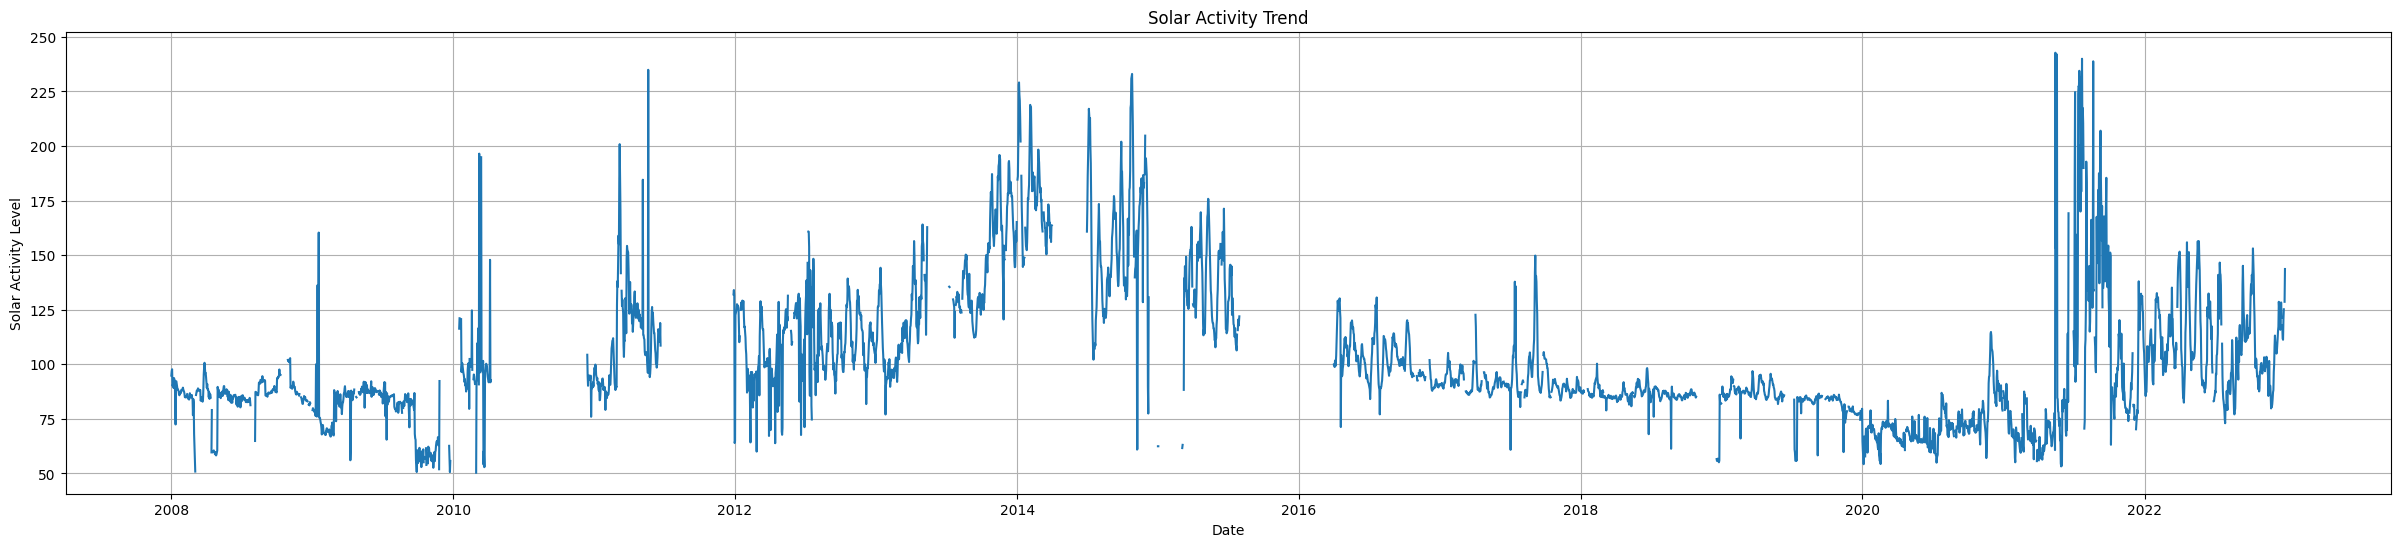

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(train_data['date'], train_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

### test data
1일 간격으로 기록된 이천·제주지역 2.8GHz 태양전파 관측자료(60일분)

In [ ]:
test_data = pd.read_excel("/Users/project/solar/ai_competition_test.xlsx")
test_data.head()

,date,flux
0,1,101.889
1,2,106.757
2,3,99.386
3,4,109.947
4,5,110.365


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    60 non-null     int64  
 1   flux    60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


## 데이터 전처리

### 결측치 처리
- ✔︎: 결측치 처리 잘됨
- △: 결측치 처리 미흡
- ✘: 데이터가 망가짐

In [ ]:
train_data.isna().sum()

date       0
flux    1251
dtype: int64

In [ ]:
train_data[train_data['flux'].isna()]

,date,flux
63,2008-03-04,NaN
103,2008-04-13,NaN
106,2008-04-16,NaN
196,2008-07-15,NaN
200,2008-07-19,NaN
...,...,...
5291,2022-06-27,NaN
5292,2022-06-28,NaN
5314,2022-07-20,NaN
5470,2022-12-23,NaN


#### 결측치 확인하기

In [ ]:
df = train_data.copy()

df_by_year = df.groupby(df['date'].dt.year)

for year, df_year in df_by_year:
    print(f"{year}년: {df_year['flux'].isna().sum()}")

2008년: 46
2009년: 49
2010년: 275
2011년: 188
2012년: 16
2013년: 68
2014년: 120
2015년: 217
2016년: 109
2017년: 19
2018년: 64
2019년: 41
2020년: 7
2021년: 25
2022년: 7


##### 1. 선형 보간 (✔︎)

In [ ]:
linear_data = train_data.copy()
print(f'original imputation: \n {linear_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


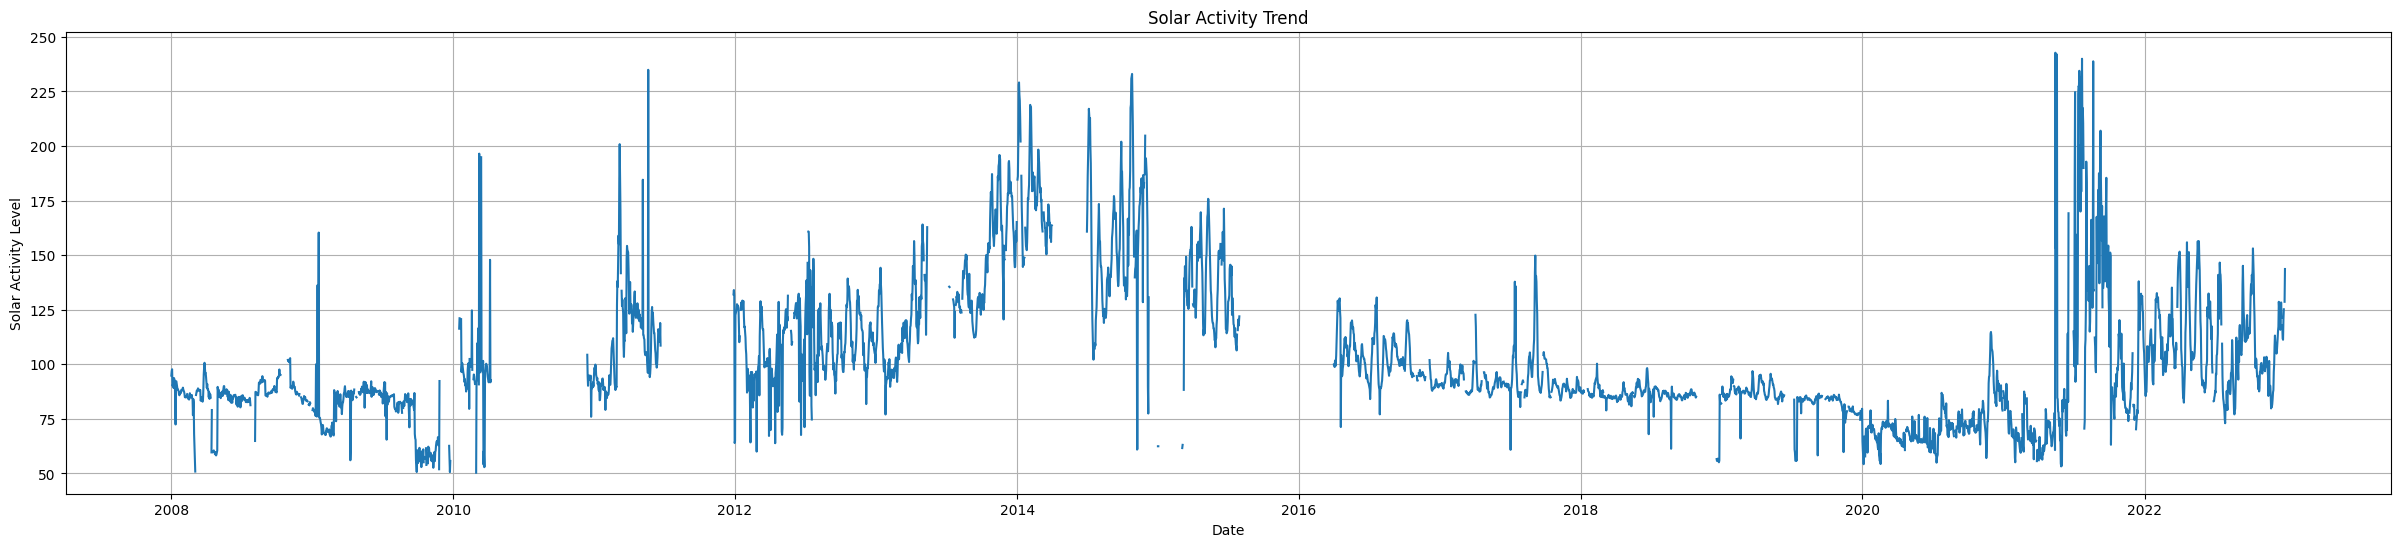

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(linear_data['date'], linear_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
linear_data.interpolate(method='linear', inplace=True)
print(f'linear interpolation imputation: \n {linear_data.isna().sum()}')

linear interpolation imputation: 
 date    0
flux    0
dtype: int64


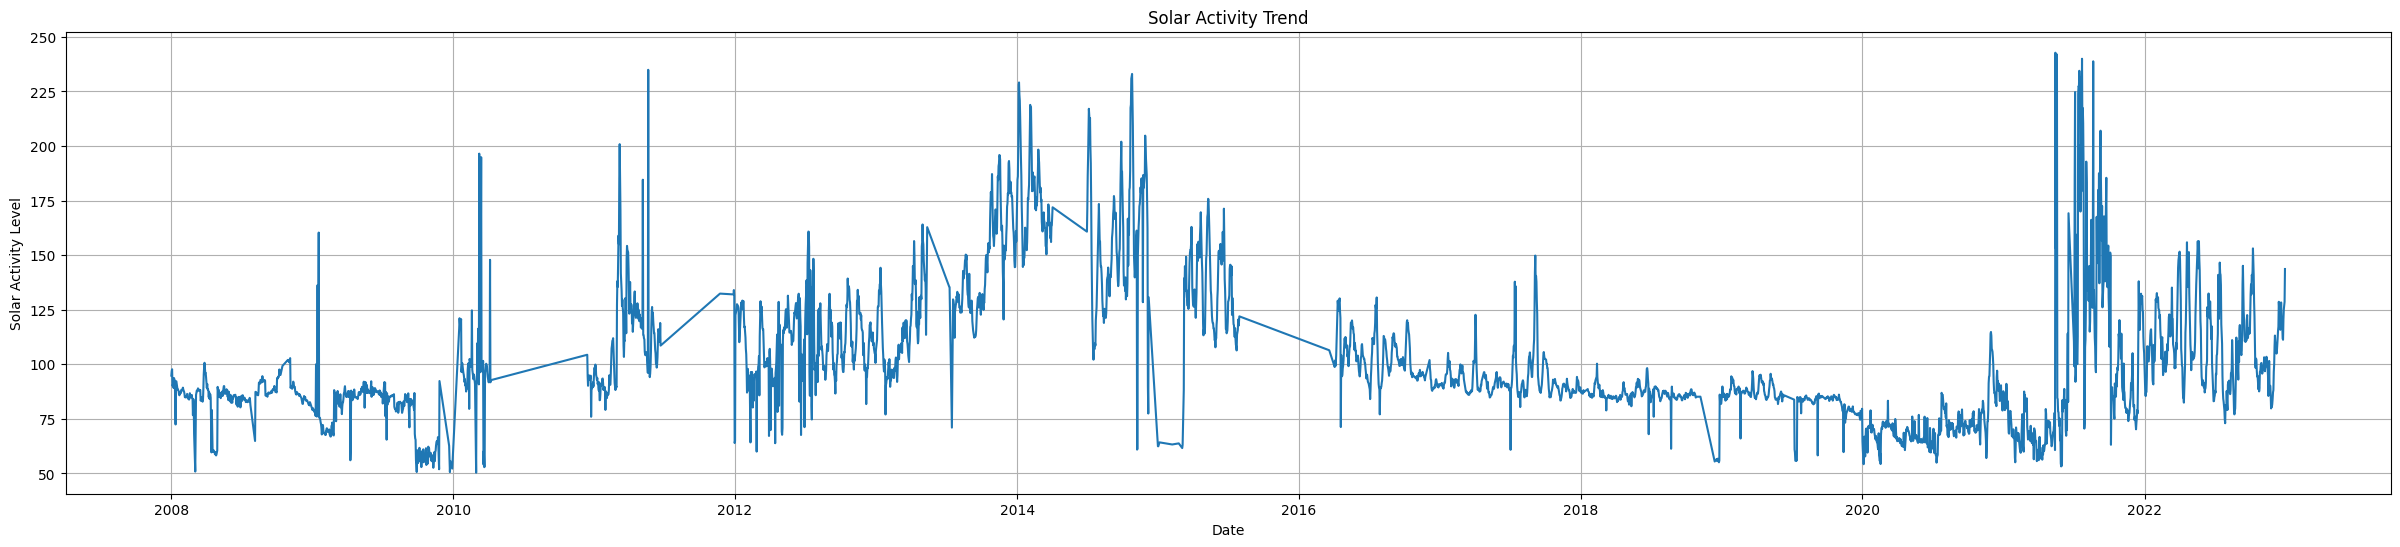

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(linear_data['date'], linear_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

##### 2. 비선형 보간법 (✘)
근사 함수가 비선형(non-linear) 함수임을 가정
</br>
- 데이터 사망.

In [ ]:
from scipy.interpolate import interp1d

nonlinear_data = train_data.copy()

print(f'original imputation: \n {nonlinear_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


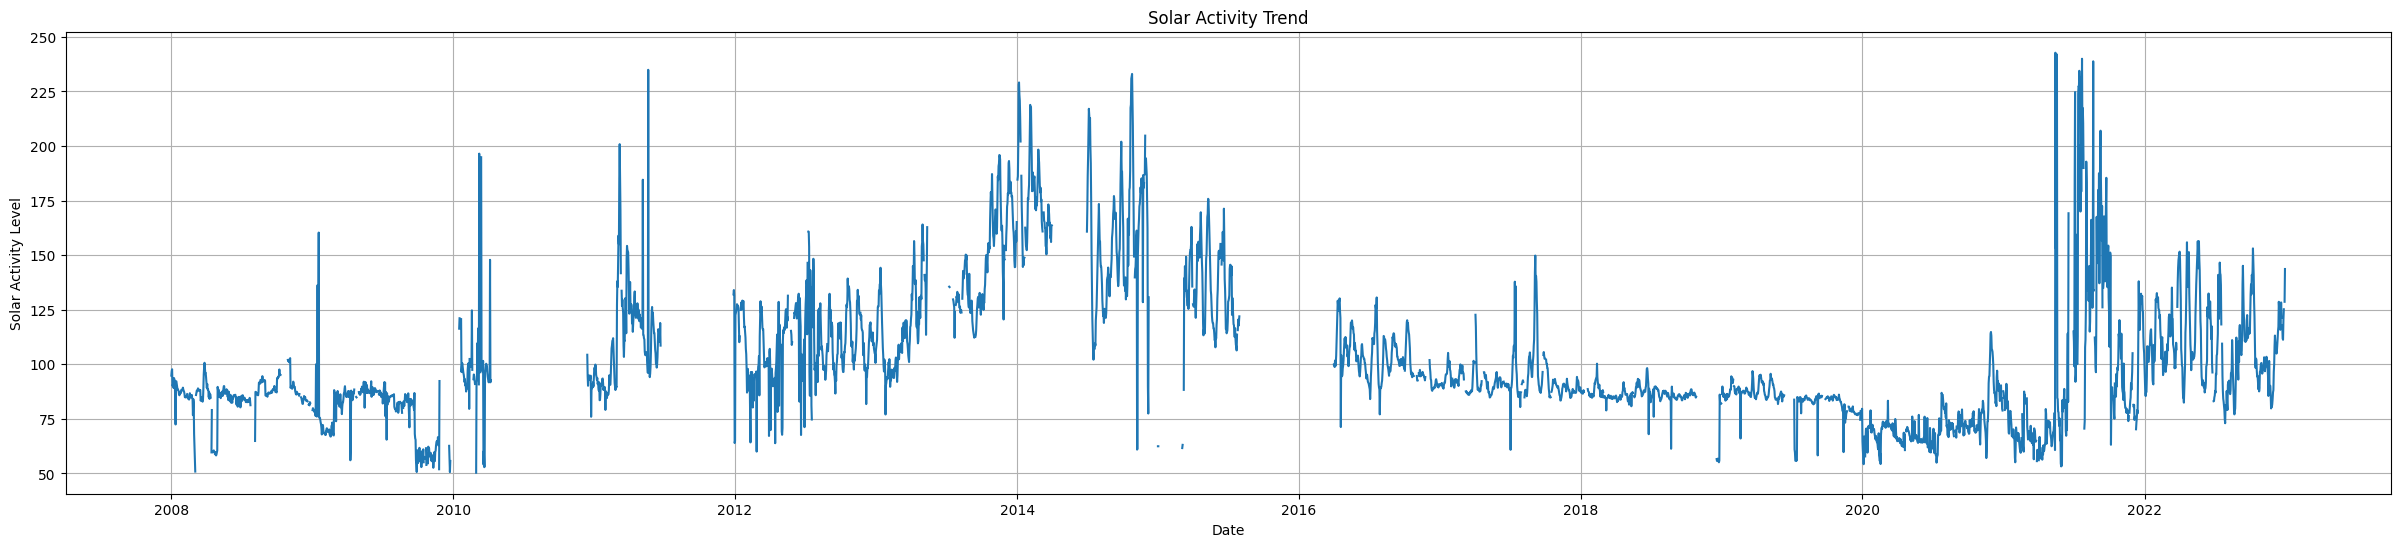

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(nonlinear_data['date'], nonlinear_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
# 결측치를 보간할 x와 y 값 추출
x = nonlinear_data['date'].notna()
y = nonlinear_data['flux'].notna()
x = x[y]
y = nonlinear_data['flux'].dropna()

# 비선형 보간 함수 생성
f = interp1d(x.index, y, kind='quadratic', fill_value='extrapolate')

# 결측치를 보간
nonlinear_data.loc[nonlinear_data['flux'].isna(), 'flux'] = f(nonlinear_data.index[nonlinear_data['flux'].isna()])

# 비선형 보간을 적용한 데이터프레임 확인
print(f'non-linear interpolation imputation: \n {nonlinear_data.isna().sum()}')

non-linear interpolation imputation: 
 date    0
flux    0
dtype: int64


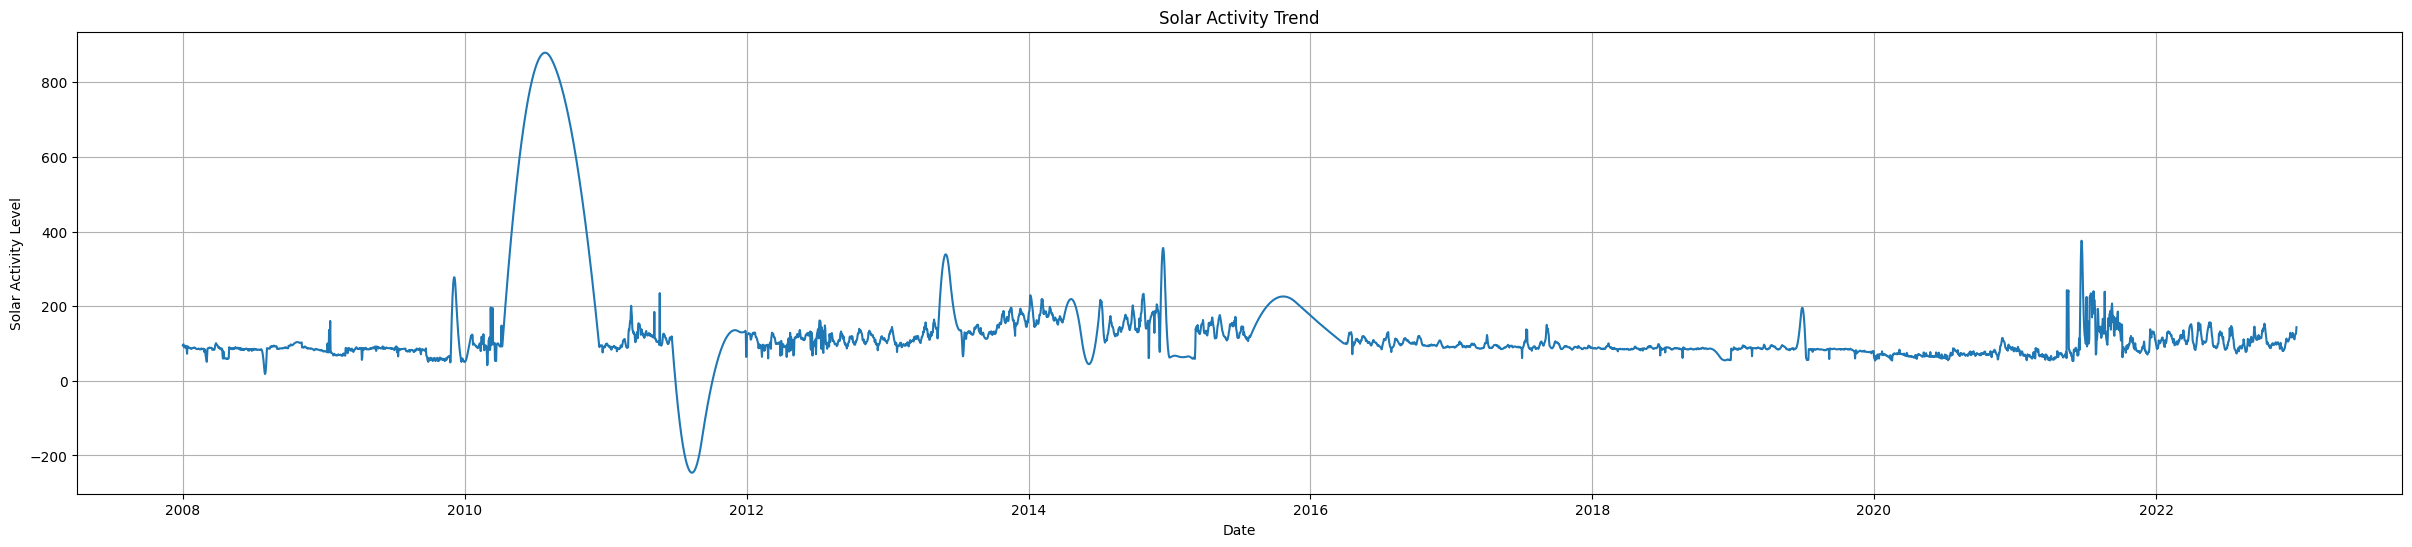

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(nonlinear_data['date'], nonlinear_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

##### 3. 다항 보간 (✘)
order: 보간할 다항식의 차수
- order가 높을수록 더 복잡한 함수를 사용할 수 있으며, 따라서 더 정확한 결과를 얻을 수 있다.
    - order가 1인 경우, 결측치가 있는 데이터 포인트와 가장 가까운 두 데이터 포인트 사이의 직선을 사용하여 결측치를 추정한다.
    - order가 2인 경우, 결측치가 있는 데이터 포인트와 가장 가까운 세 데이터 포인트 사이의 이차 함수를 사용하여 결측치를 추정한다.
    - order가 3인 경우, 결측치가 있는 데이터 포인트와 가장 가까운 네 데이터 포인트 사이의 삼차 함수를 사용하여 결측치를 추정한다.
</br>
- 데이터 사망.


In [ ]:
polynomial_data = train_data.copy()
print(f'original imputation: \n {polynomial_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


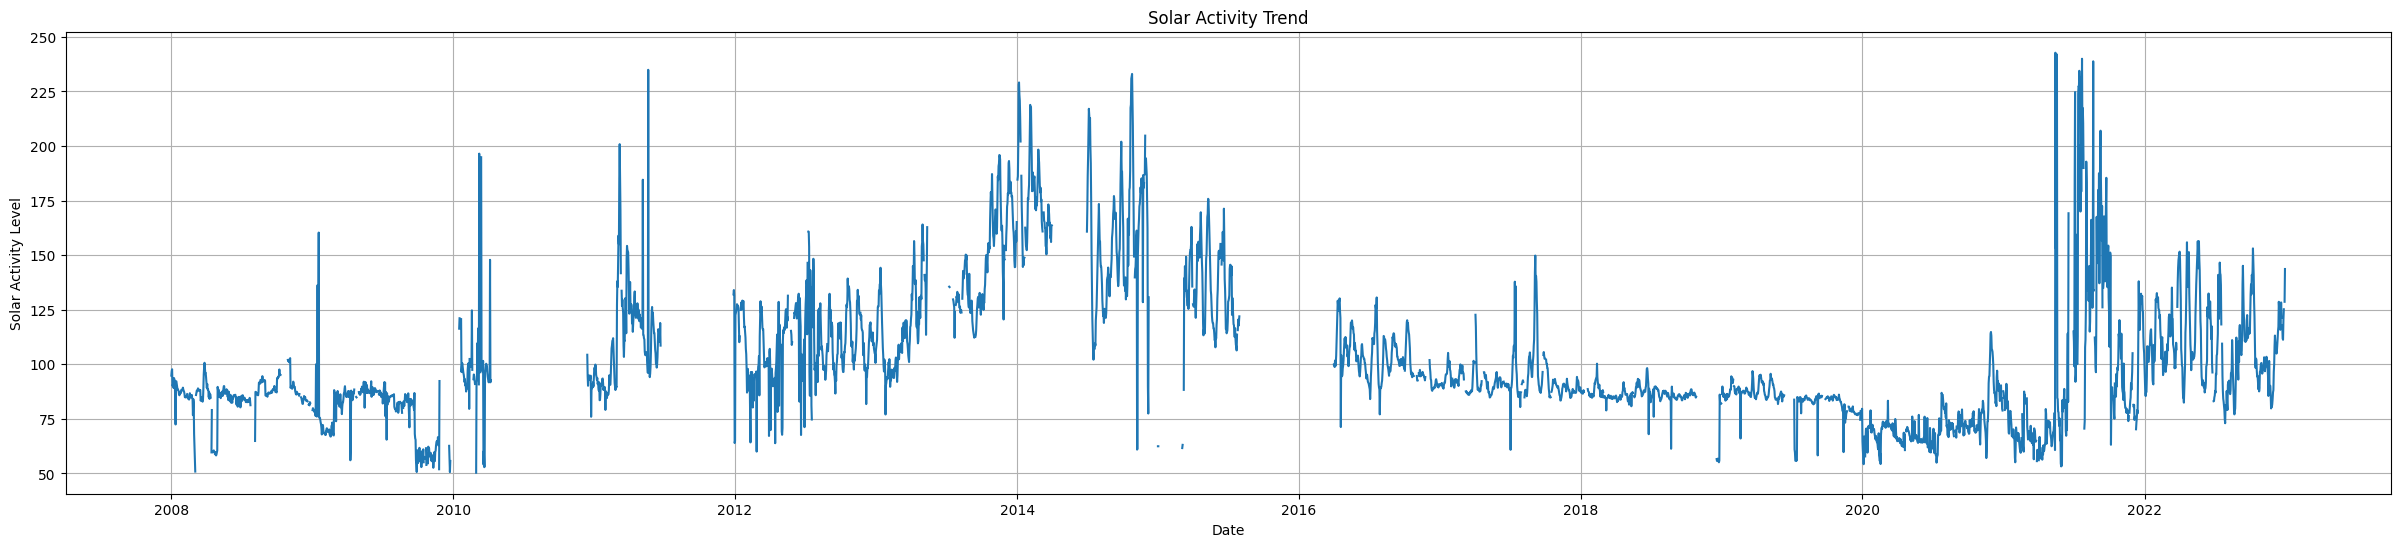

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(polynomial_data['date'], polynomial_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
polynomial_data['flux'].interpolate(method='polynomial', order=2, inplace=True)
print(f'polynomial interpolation imputation: \n {polynomial_data.isna().sum()}')

polynomial interpolation imputation: 
 date    0
flux    0
dtype: int64


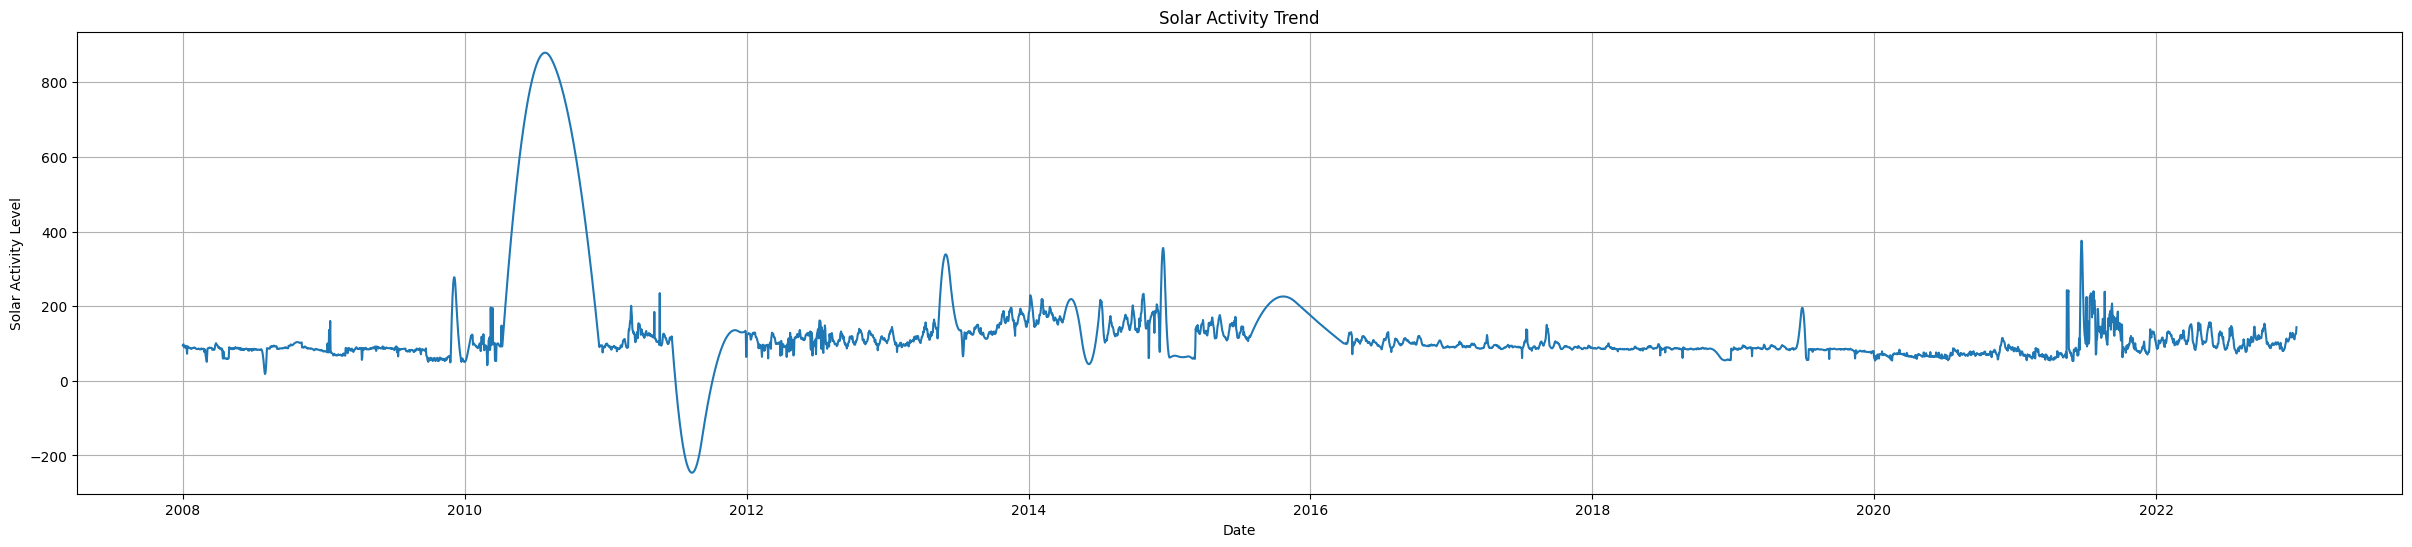

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(polynomial_data['date'], polynomial_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

##### 4. 스플라인(spline) 보간법 (✘)
연속적인 데이터 포인트 사이에서 곡선 또는 스플라인을 사용하여 보간하는 수학적 기법 중 하나
- 데이터 포인트 사이를 부드럽게 연결하여 측정값을 추정하는 데 사용된다.
- 주로 곡선 보간에서 사용되며, 데이터 포인트가 시간, 공간 또는 다른 연속적인 독립 변수를 가질 때 유용하다.
</br>
- 데이터 사망..

In [ ]:
spline_data = train_data.copy()
print(f'original imputation: \n {spline_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


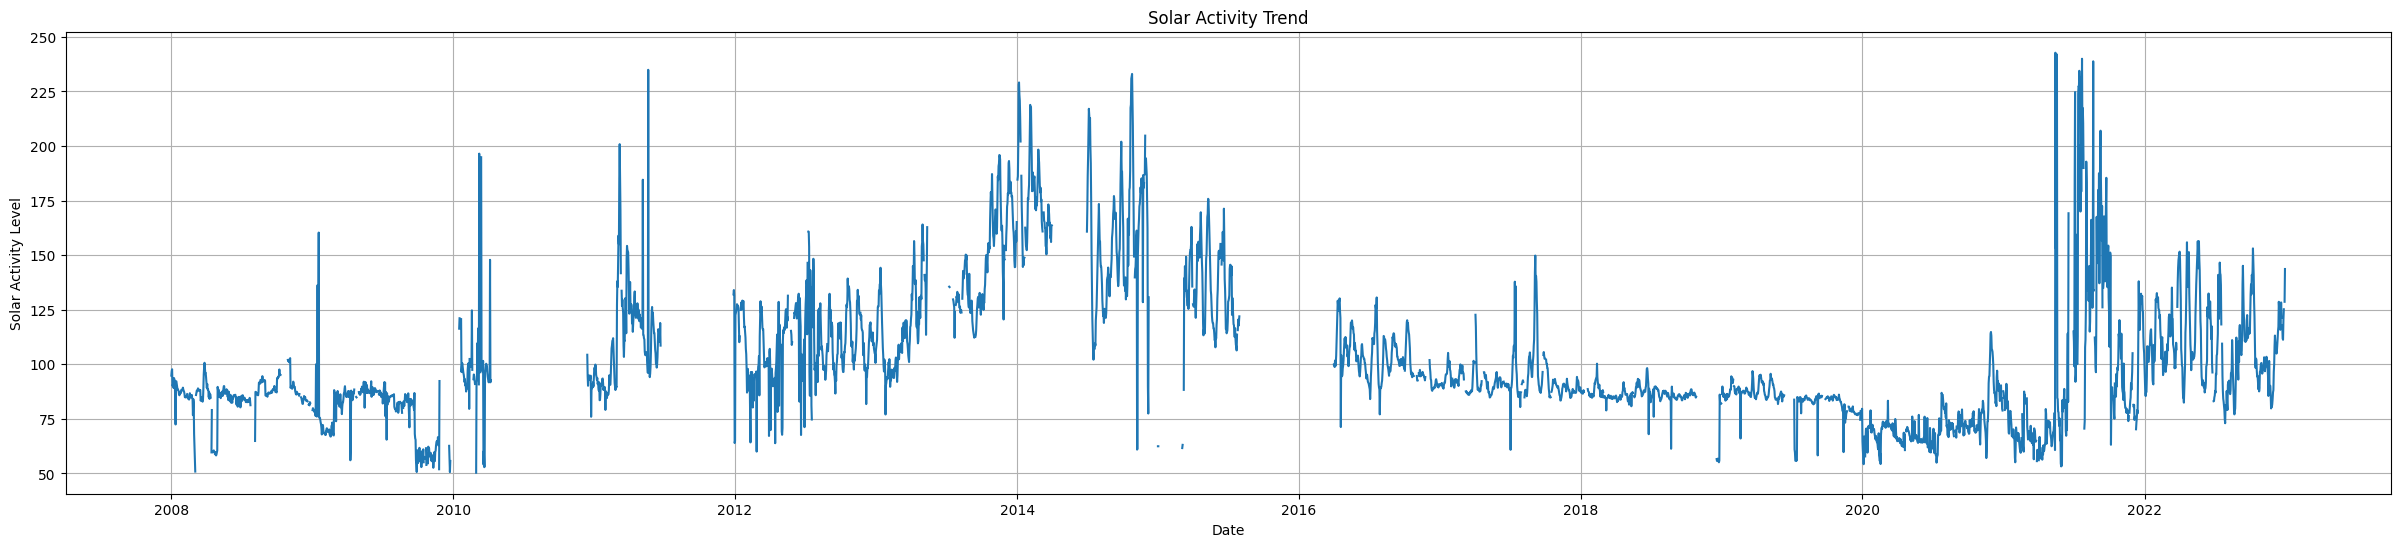

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(spline_data['date'], spline_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
spline_data['flux'].interpolate(method='spline', order=5, inplace=True)
print(f'spline interpolation imputation: \n {spline_data.isna().sum()}')

spline interpolation imputation: 
 date    0
flux    0
dtype: int64


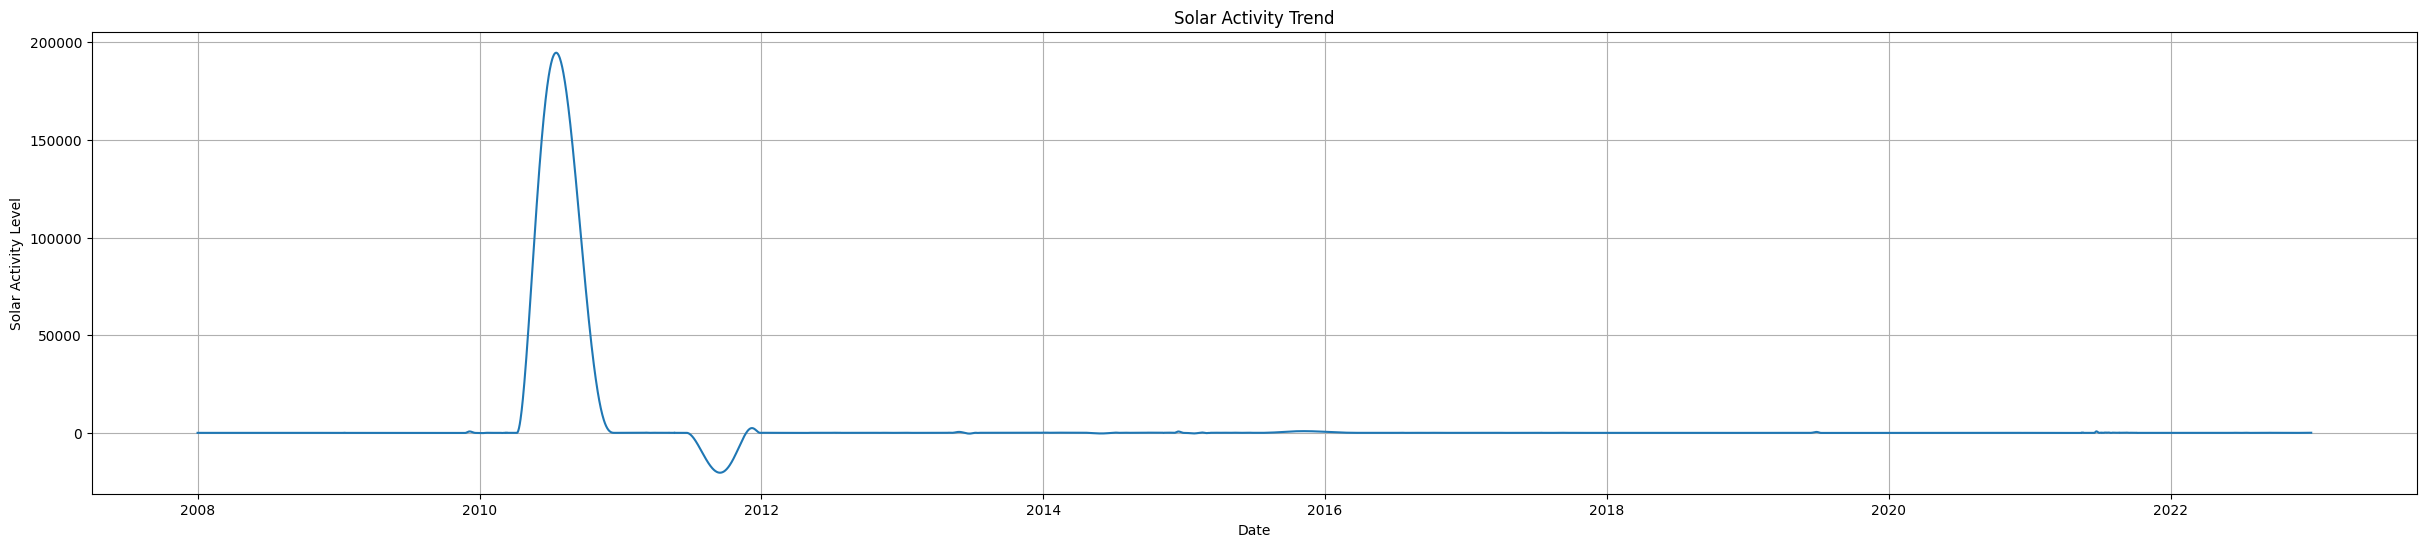

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(spline_data['date'], spline_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

##### 5. 확률적 회귀 보간(Stochastic Regression Imputation) (✔︎)
결측치 처리를 위해 회귀 모델을 사용하는 방법 중 하나
- 결측치가 있는 열의 값들을 회귀 분석을 통해 예측하고 채워 넣는 방식

In [ ]:
from sklearn.linear_model import LinearRegression

def stochastic_regression_imputation(df, column_with_missing_values, dependent_columns):
    # 결측치를 채울 회귀 모델 초기화
    model = LinearRegression()

    # 결측치가 없는 행과 결측치가 있는 행을 분리
    missing_values = df[df[column_with_missing_values].isna()]
    non_missing_values = df.dropna(subset=[column_with_missing_values])

    # 회귀 모델 학습
    X_train = non_missing_values[dependent_columns]
    y_train = non_missing_values[column_with_missing_values]
    model.fit(X_train, y_train)

    # 결측치를 채우기 위한 예측
    X_missing = missing_values[dependent_columns]
    imputed_values = model.predict(X_missing)

    # 결측치를 채우고 데이터프레임을 업데이트
    missing_values[column_with_missing_values] = imputed_values
    df = pd.concat([non_missing_values, missing_values], ignore_index=True)

    return df

In [ ]:
stochastic_data = train_data.copy()
print(f'original imputation: \n {stochastic_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


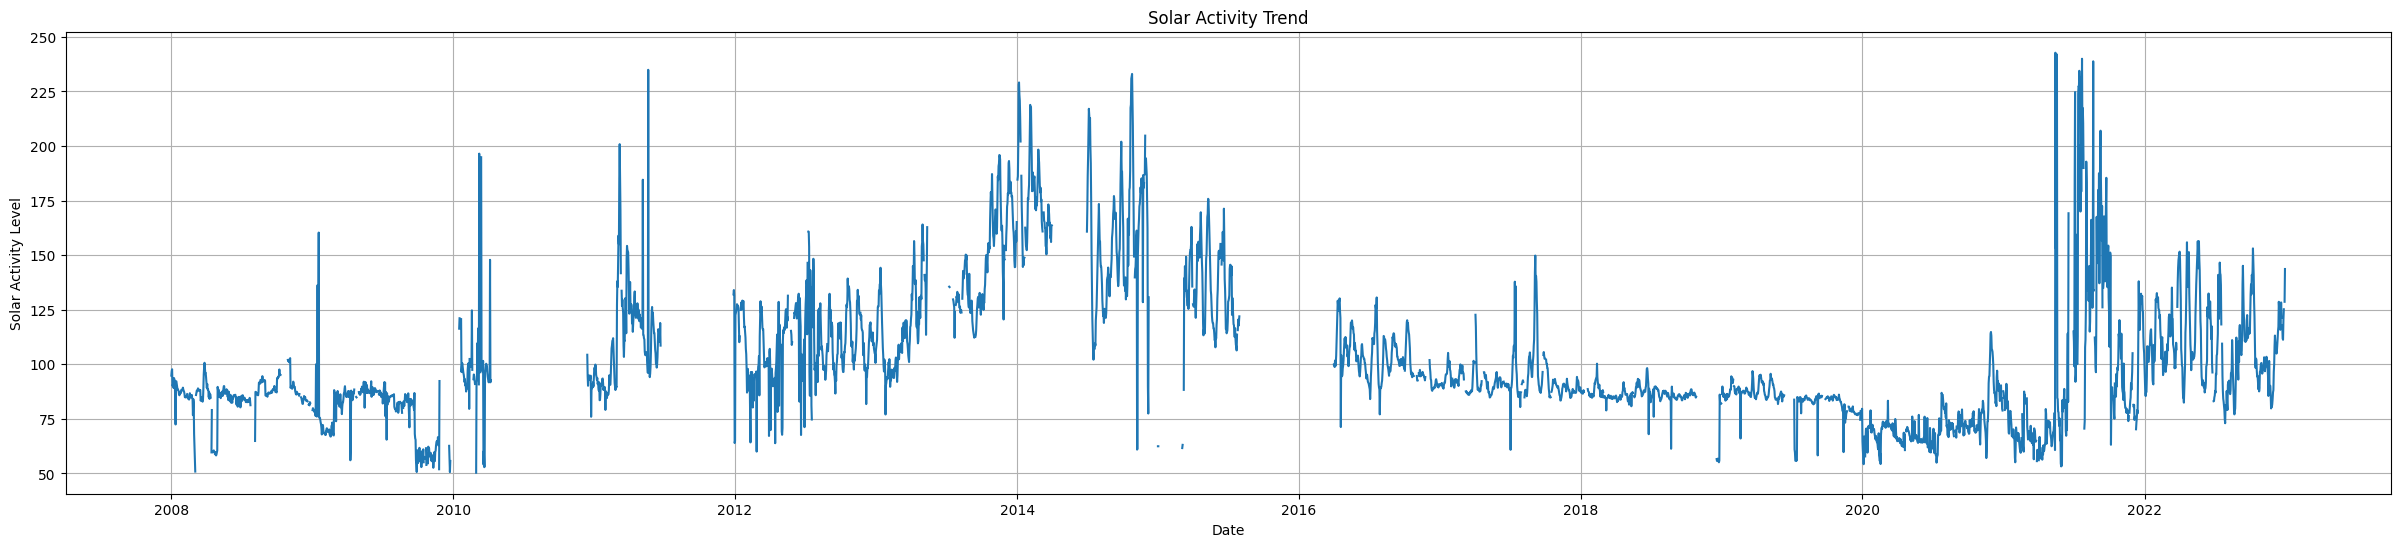

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend)
# stochastic_data['date'] = train_data['date'].dt.strftime('%Y-%m-%d')
plt.figure(figsize=(30, 6))
plt.plot(stochastic_data['date'], stochastic_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
# 결측치를 처리할 열 및 회귀에 사용할 종속 변수 선택
stochastic_data['date'] = stochastic_data['date'].dt.day

column_with_missing_values = 'flux'
dependent_columns = ['date']

# 확률적 회귀 보간 함수를 호출하여 결측치 처리
imputed_data = stochastic_regression_imputation(stochastic_data, column_with_missing_values, dependent_columns)

print(f'stochastic regression imputation: \n {imputed_data.isna().sum()}')

stochastic regression imputation: 
 date    0
flux    0
dtype: int64


/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_6912/3177580593.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values[column_with_missing_values] = imputed_values


In [ ]:
imputed_data['date'] = train_data['date'].dt.strftime('%Y-%m-%d')

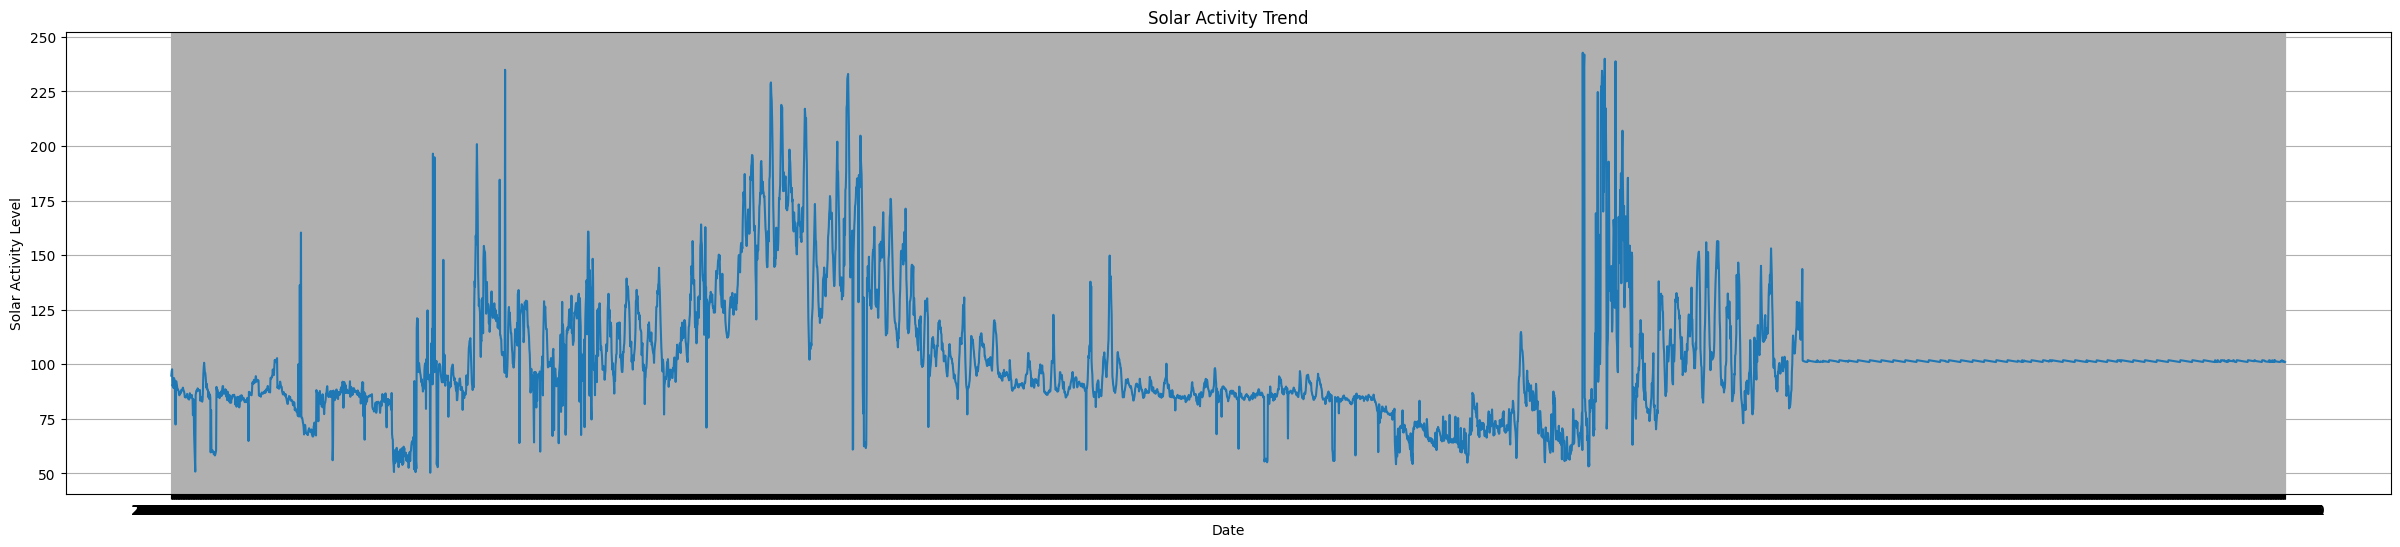

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(imputed_data['date'], imputed_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
# 데이터프레임을 엑셀 파일로 저장
imputed_data[['flux']].to_csv("/Users/project/solar/filled_data_stochastic_regression.csv", index=False)

##### 6. 회귀 보간(Regression imputation) (✔︎)
결측치가 존재하지 않는 변수를 feature로 삼고, 결측치를 채우고자 하는 변수를 target으로 삼아 regression task를 진행하는 것
- 데이터 내의 다른 변수를 기반으로 결측치를 예측하는 것이기 때문에 변수 간 관계를 그대로 보존할 수 있지만 동시에 예측치 간 variability는 보존하지 못한다.

In [ ]:
regression_data = train_data.copy()
print(f'original imputation: \n {regression_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


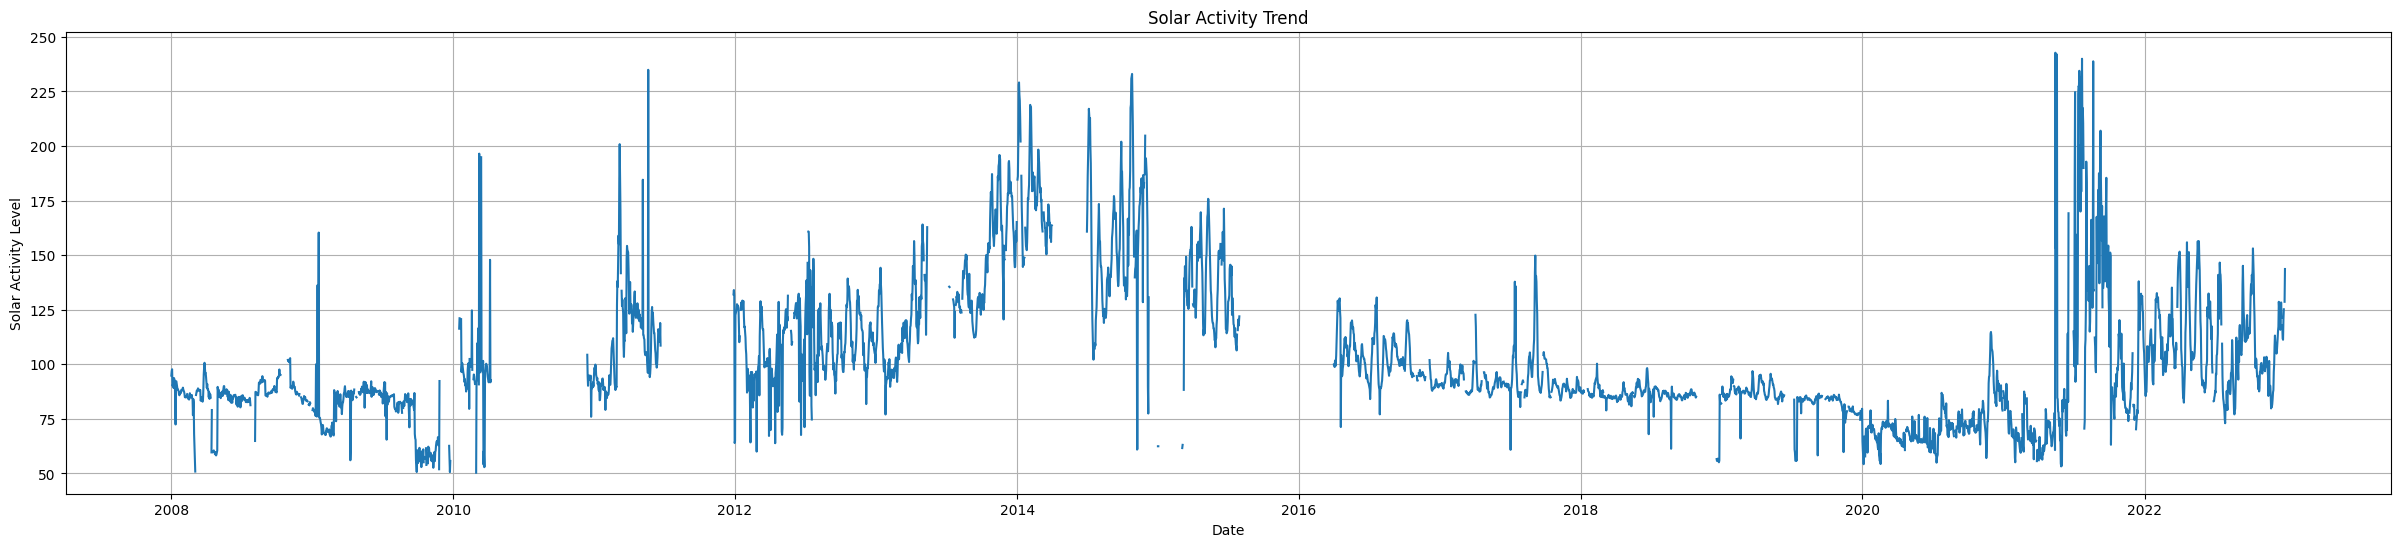

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend):
plt.figure(figsize=(30, 6))
plt.plot(regression_data['date'], regression_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
# 'date' 열을 숫자로 변환 (예: 일자로 변환)
regression_data['date'] = regression_data['date'].dt.day

# 결측치가 없는 행과 결측치가 있는 행 분할
missing_data = regression_data[regression_data['flux'].isna()]
non_missing_data = regression_data.dropna(subset=['flux'])

# 회귀 모델을 학습하기 위한 독립 변수와 종속 변수 선택
X_train = non_missing_data[['date']]
y_train = non_missing_data['flux']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 결측치가 있는 행의 'flux' 값을 예측
X_missing = missing_data[['date']]
predicted_values = model.predict(X_missing)

# 예측한 값을 결측치가 있는 행의 'flux' 열에 채워 넣기
missing_data['flux'] = predicted_values

# 결측치를 채운 데이터와 원래의 데이터를 합치기
regression_data_ = pd.concat([non_missing_data, missing_data])

print(f'regression imputation: \n {regression_data_.isna().sum()}')

regression imputation: 
 date    0
flux    0
dtype: int64


/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_6912/3937927828.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['flux'] = predicted_values


In [ ]:
regression_data_['date'] = train_data['date'].dt.strftime('%Y-%m-%d')

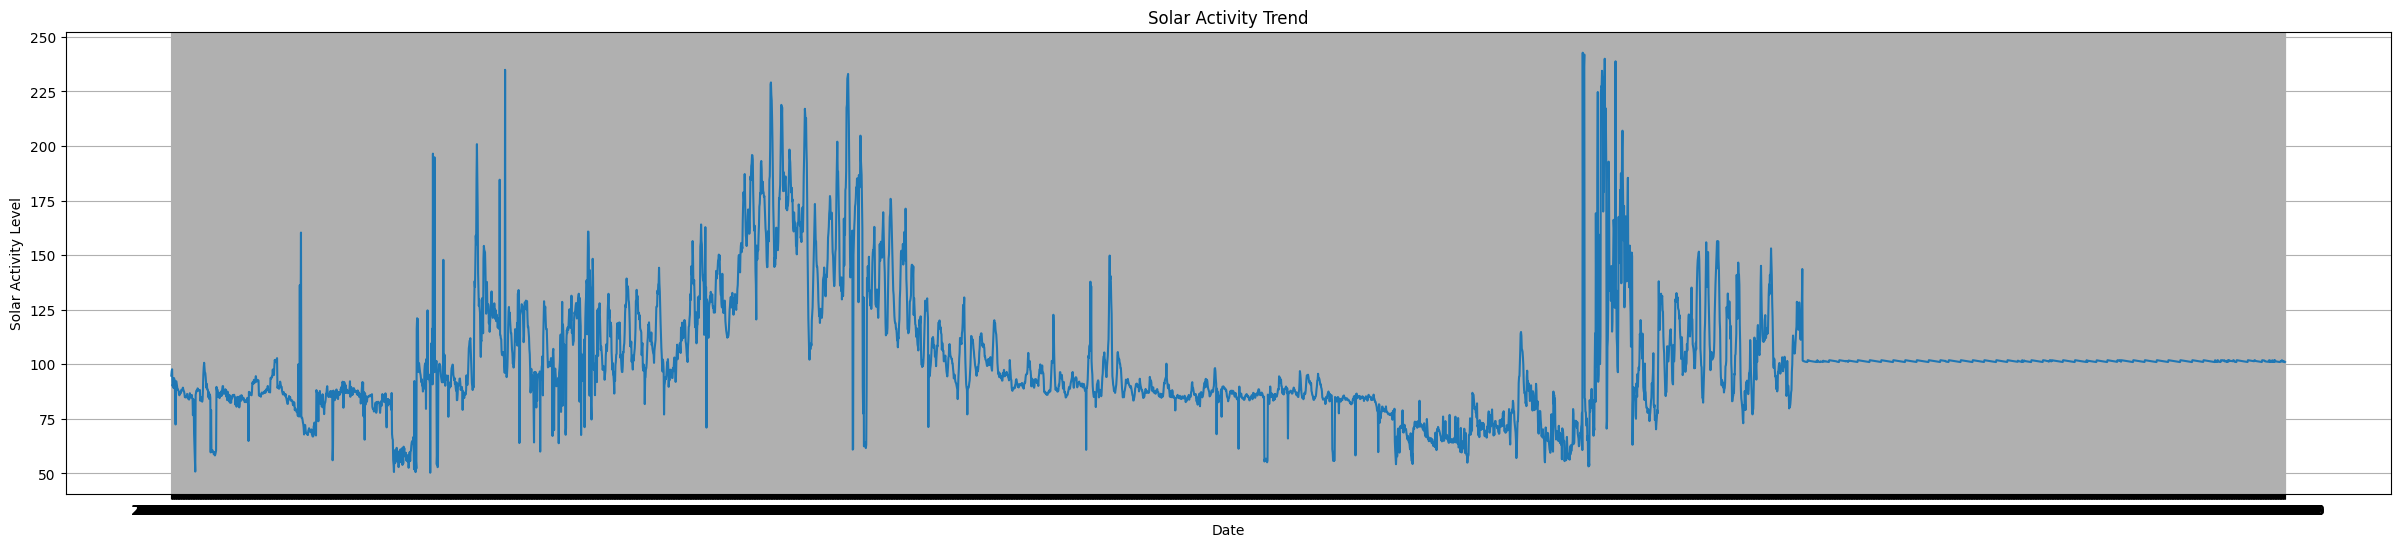

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend)
plt.figure(figsize=(30, 6))
plt.plot(regression_data_['date'], regression_data_['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
# 데이터프레임을 엑셀 파일로 저장
regression_data_[['flux']].to_csv("/Users/project/solar/filled_data_regression.csv", index=False)

##### 7. 콜드 덱(clod deck) (△)
다른 변수에서 비슷한 값을 갖는 데이터 중에서 하나를 골라 그 값으로 결측치를 대체하는 방식
- cold deck imputation에서는 비슷한 양상의 데이터 중에서 하나를 랜덤 샘플링하는 것이 아니라 어떠한 규칙에서 하나를 선정하는 것
    - 예를 들면, k번째 샘플의 값을 취해온다는 등

In [ ]:
cold_data = train_data.copy()
print(f'original imputation: \n {cold_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


In [ ]:
def cold_deck_imputation(df, index):
    # 결측치가 있는 행의 월을 확인
    month = df['date'].iloc[index].month
    # 동일한 월의 이전 연도 데이터 선택
    similar_data = df[(df['date'].dt.month == month) & (df['date'].dt.year < df['date'].iloc[index].year)]
    # 동일한 월의 이전 연도 데이터에서 'flux' 열의 평균값 가져오기 (또는 다른 방법 사용)
    mean_flux = similar_data['flux'].mean()
    # 결측치 대체
    df.at[index, 'flux'] = mean_flux

# 결측치 인덱스
missing_indices = cold_data[cold_data['flux'].isna()].index


# 결측치 처리
for index in missing_indices:
    cold_deck_imputation(cold_data, index)

print(f'cold deck imputation: \n {cold_data.isna().sum()}')

cold deck imputation: 
 date     0
flux    46
dtype: int64


In [ ]:
cold_data.interpolate(method='linear', inplace=True)
print(f'cold deck imputation: \n {cold_data.isna().sum()}')

cold deck imputation: 
 date    0
flux    0
dtype: int64


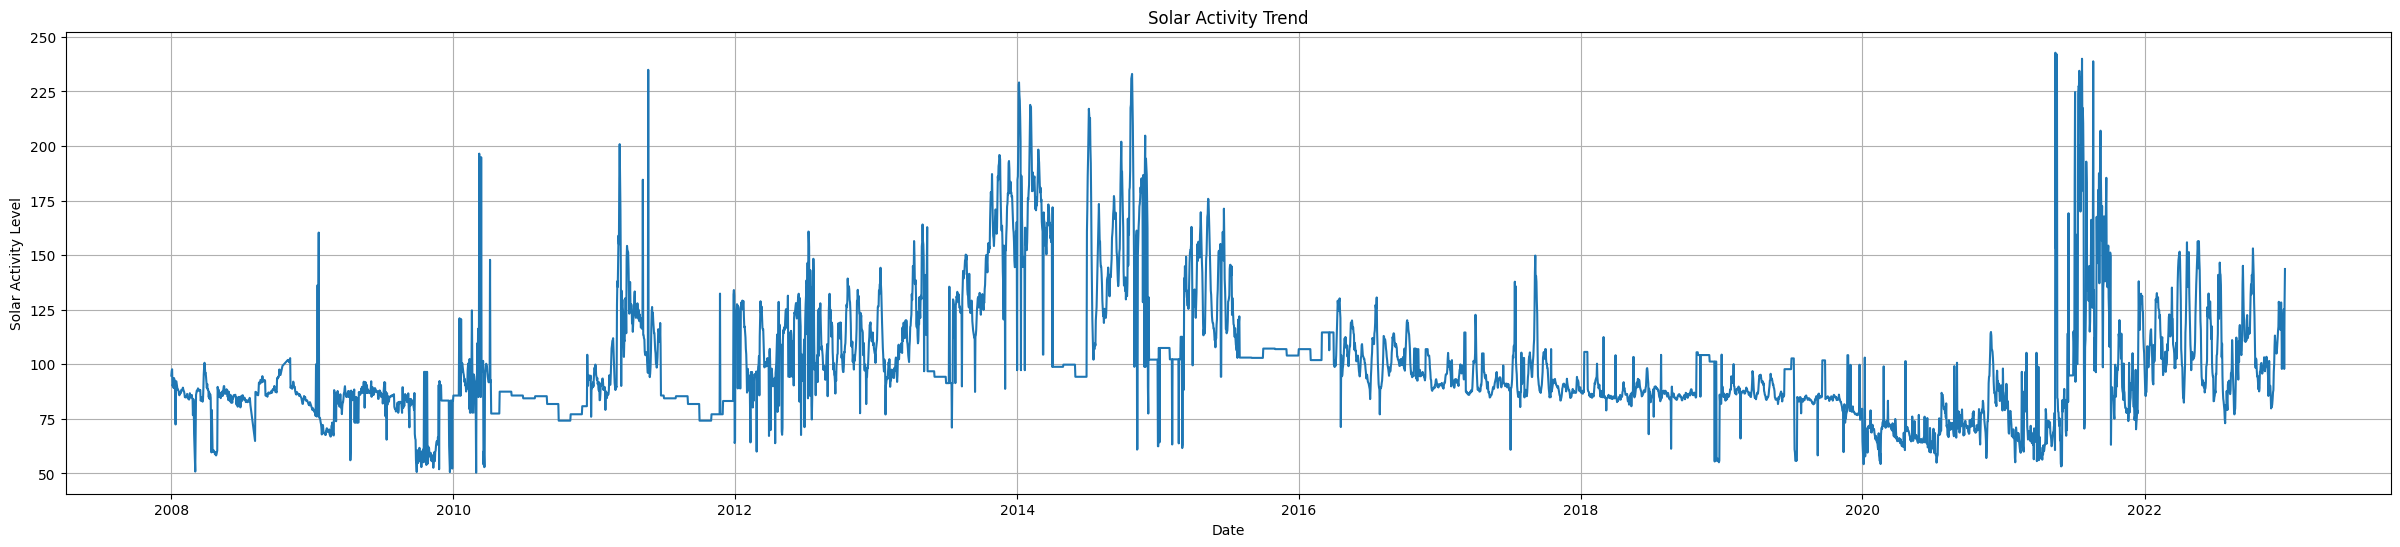

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend)
plt.figure(figsize=(30, 6))
plt.plot(cold_data['date'], cold_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
# 데이터프레임을 엑셀 파일로 저장
cold_data[['flux']].to_csv("/Users/project/solar/filled_data_cold_deck.csv", index=False)

##### 8. 핫 덱(hot dect) (△)
다른 변수에서 비슷한 값을 갖는 데이터 중에서 하나를 랜덤 샘플링하여 그 값을 복사해오는 방법
- 이 방법은 결측값이 존재하는 변수가 가질 수 있는 값의 범위가 한정되어 있을 때 이점을 갖는다.
- random하게 가져온 값이기 때문에 어느 정도 변동성을 더해준다는 점에서 표준오차의 정확도에 어느 정도 기여를 한다는 점이다.

In [ ]:
hot_data = train_data.copy()
print(f'original imputation: \n {hot_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


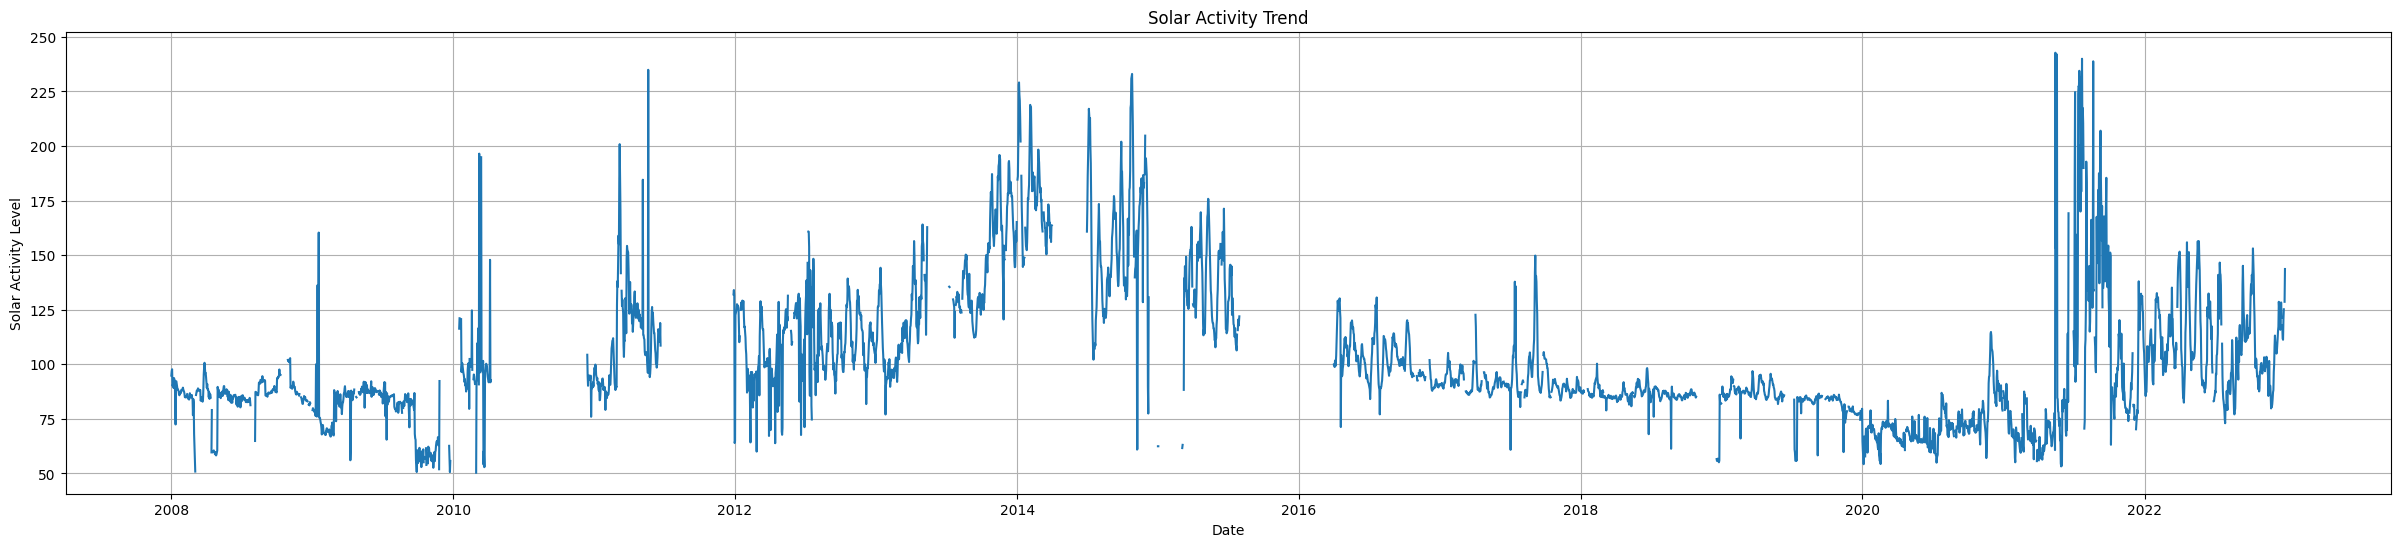

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend)
plt.figure(figsize=(30, 6))
plt.plot(hot_data['date'], hot_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
def hot_deck_imputation(df, index):
    # 결측치가 있는 행의 일을 확인
    day = df['date'].iloc[index].day
    # 동일한 일의 다른 날짜 데이터 선택
    hot_deck_data = df[(df['date'].dt.day == day) & (df.index != index)]
    # 동일한 일의 다른 날짜 데이터에서 'flux' 열의 값 중 하나를 가져오기
    hot_flux = hot_deck_data['flux'].sample(1).values[0]
    # 결측치 대체
    df.at[index, 'flux'] = hot_flux

# 결측치 인덱스
missing_indices = hot_data[hot_data['flux'].isna()].index

# 결측치 처리
for index in missing_indices:
    hot_deck_imputation(hot_data, index)

print(f'hot deck imputation: \n {hot_data.isna().sum()}')

hot deck imputation: 
 date      0
flux    170
dtype: int64


In [ ]:
# 결측치 인덱스
missing_indices = hot_data[hot_data['flux'].isna()].index

# 결측치 처리
for index in missing_indices:
    hot_deck_imputation(hot_data, index)

print(f'hot deck imputation: \n {hot_data.isna().sum()}')

hot deck imputation: 
 date    0
flux    6
dtype: int64


In [ ]:
# 결측치 인덱스
missing_indices = hot_data[hot_data['flux'].isna()].index

# 결측치 처리
for index in missing_indices:
    hot_deck_imputation(hot_data, index)

print(f'hot deck imputation: \n {hot_data.isna().sum()}')

hot deck imputation: 
 date    0
flux    0
dtype: int64


In [ ]:
# hot_data.interpolate(method='linear', inplace=True)
print(f'hot deck imputation: \n {hot_data.isna().sum()}')

hot deck imputation: 
 date    0
flux    0
dtype: int64


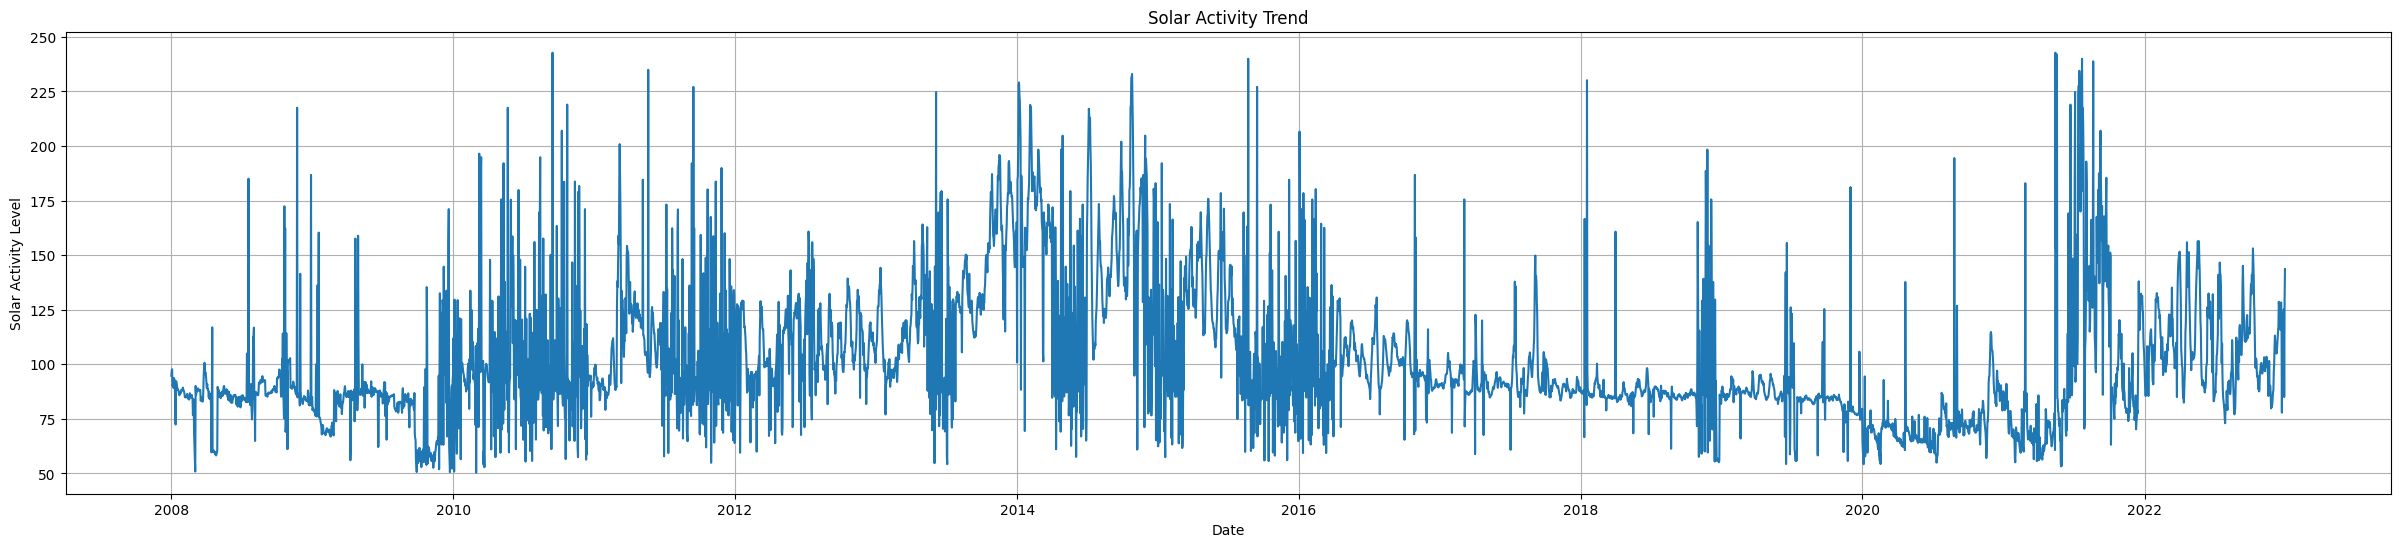

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend)
plt.figure(figsize=(30, 6))
plt.plot(hot_data['date'], hot_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
# 데이터프레임을 엑셀 파일로 저장
hot_data[['flux']].to_csv("/Users/project/solar/filled_data_hot_deck.csv", index=False)

##### 8. 보외법(extrapolation) (✔︎)
주어진 데이터 범위를 벗어난 값을 예측
- longitudinal data의 경우에만 가능할 것이다.

In [ ]:
from sklearn.linear_model import LinearRegression

extrapolation_data = train_data.copy()
print(f'original imputation: \n {extrapolation_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


In [ ]:
# 결측치 인덱스
missing_indices = extrapolation_data[extrapolation_data['flux'].isna()].index

# 외삽 모델 선택 (선형 회귀 사용 예)
model = LinearRegression()

# 외삽 수행
for index in missing_indices:
    # 예측에 사용할 특성 선택 (예: date를 숫자로 변환)
    feature = extrapolation_data['date'].dt.dayofyear
    # 예측을 위한 데이터 포인트 선택
    known_points = extrapolation_data[~extrapolation_data['flux'].isna()]
    X = known_points['date'].dt.dayofyear.values.reshape(-1, 1)
    y = known_points['flux'].values
    # 모델 훈련
    model.fit(X, y)
    # 외삽을 수행하여 결측치 예측
    predicted_flux = model.predict([[feature.iloc[index]]])  # index 번째 feature만 선택
    # 결측치 채우기
    extrapolation_data.at[index, 'flux'] = predicted_flux[0]

print(f'extrapolation imputation: \n {extrapolation_data.isna().sum()}')


extrapolation imputation: 
 date    0
flux    0
dtype: int64


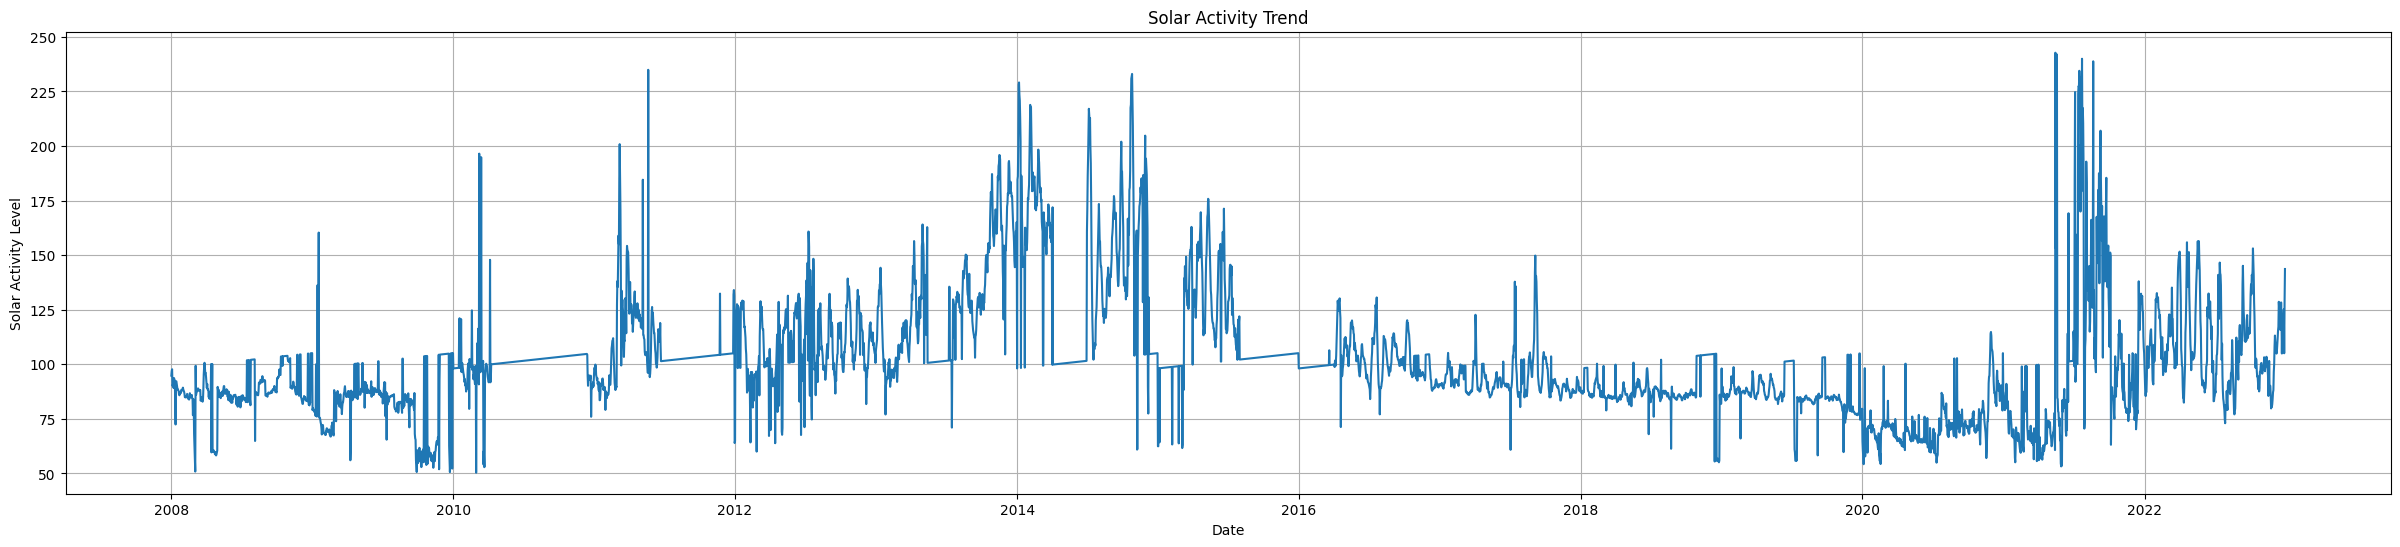

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend)
plt.figure(figsize=(30, 6))
plt.plot(extrapolation_data['date'], extrapolation_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
# 데이터프레임을 엑셀 파일로 저장
extrapolation_data[['flux']].to_csv("/Users/project/solar/filled_data_extrapolation.csv", index=False)

##### 10. 이동평균(Moving Average) (✔︎)
최근이나 과거의 여러 시간대를 활용하여 결측치를 채우는 방법
- 이동평균 계산: 이동평균을 계산하기 위해 특정 기간(예: 7일, 30일) 동안의 데이터를 평균내는 방식을 사용한다.
    - 이것은 결측치를 처리하기 위한 대체 값이 된다.
- 결측치 식별: 이동평균을 계산하기 전에 원래 데이터에서 결측치를 식별하고 결측치 위치 및 값에 대한 정보를 보존해야 한다.
- 결측치 대체: 결측치 위치에서 계산된 이동평균 값을 사용하여 결측치를 대체한다.

In [ ]:
moving_data = train_data.copy()
print(f'original imputation: \n {moving_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


In [ ]:
# 결측치 식별
missing_indices = moving_data[moving_data['flux'].isna()].index

# 이동평균 계산 (예: 7일 이동평균)
window_size = 250
moving_data['flux'].fillna(moving_data['flux'].rolling(window=window_size, min_periods=1).mean(), inplace=True)

print(f'moving average imputation: \n {moving_data.isna().sum()}')

moving average imputation: 
 date    0
flux    0
dtype: int64


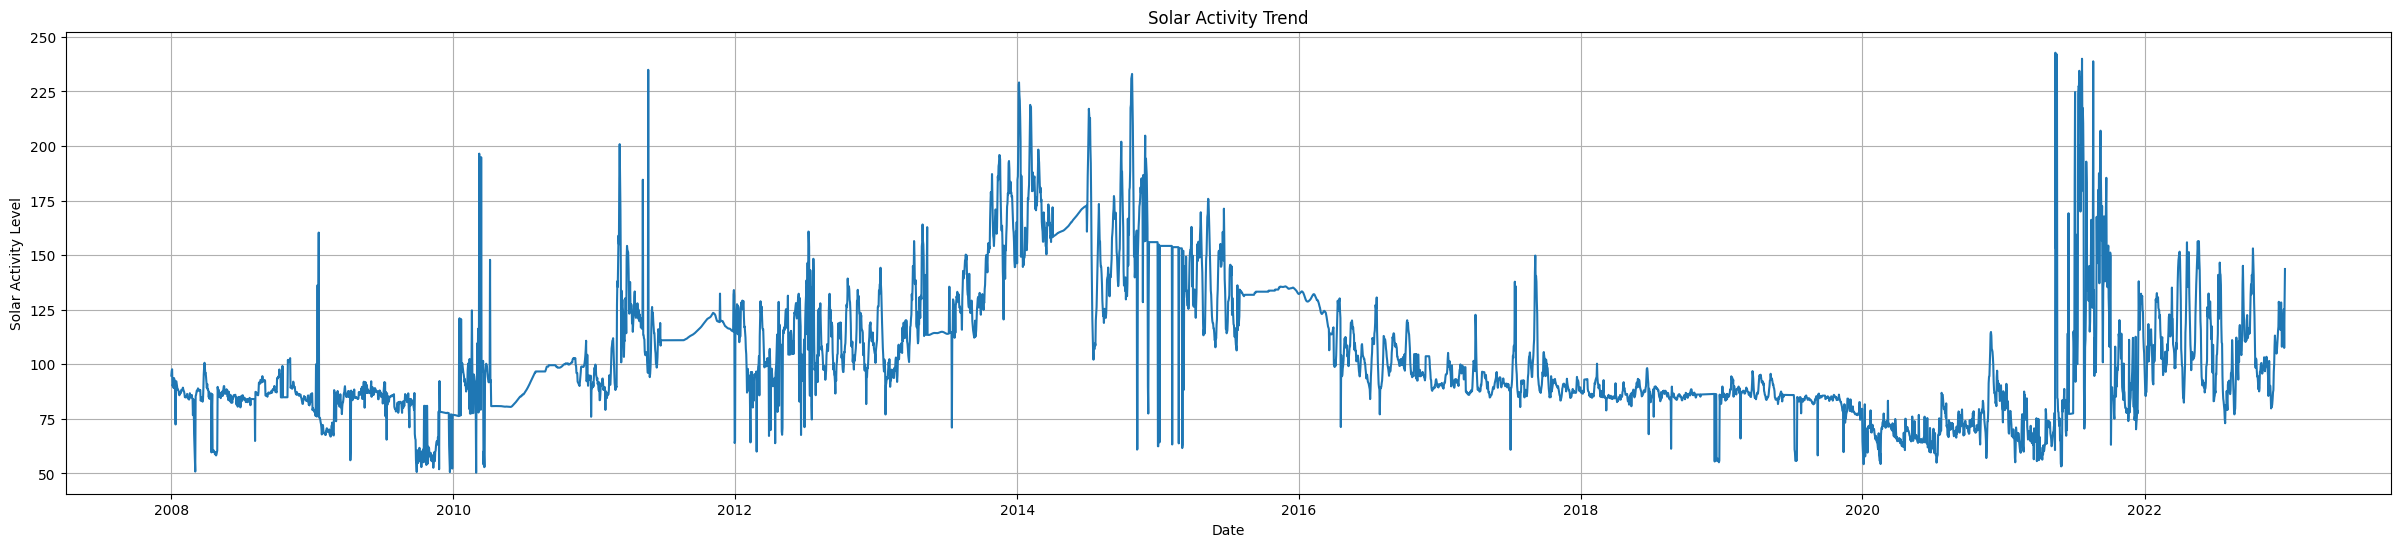

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend)
plt.figure(figsize=(30, 6))
plt.plot(moving_data['date'], moving_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
# 데이터프레임을 엑셀 파일로 저장
moving_data[['flux']].to_csv("/Users/project/solar/filled_data_moving_average.csv", index=False)

##### 11. KNNImputer (✔︎)

In [ ]:
from sklearn.impute import KNNImputer

fast_data = train_data.copy()
print(f'original imputation: \n {fast_data.isna().sum()}')

original imputation: 
 date       0
flux    1251
dtype: int64


In [ ]:
flux_column = fast_data[['flux']].to_numpy()

knn_imputer = KNNImputer(n_neighbors=250)
filled_flux = knn_imputer.fit_transform(flux_column)

# Add the filled values back to your DataFrame
fast_data['flux'] = filled_flux

print(f'KNN Imputer imputation: \n {fast_data.isna().sum()}')

KNN Imputer imputation: 
 date    0
flux    0
dtype: int64


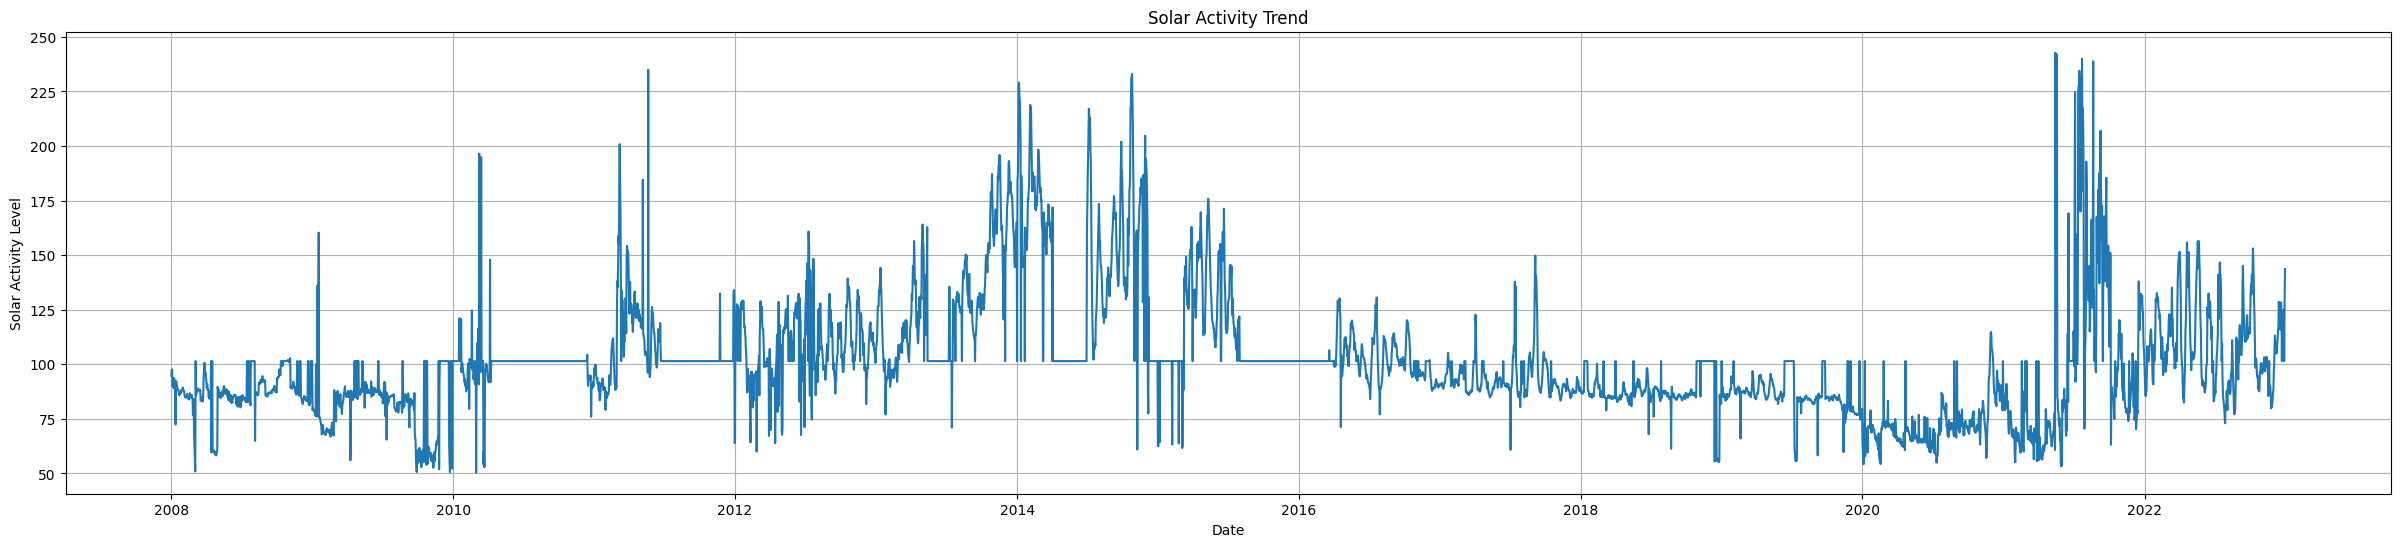

In [ ]:
# 태양활동 수준의 추이 그래프 (Solar Activity Trend)
plt.figure(figsize=(30, 6))
plt.plot(fast_data['date'], fast_data['flux'])
plt.title('Solar Activity Trend')
plt.xlabel('Date')
plt.ylabel('Solar Activity Level')
plt.grid(True)
plt.show()

In [ ]:
# 데이터프레임을 엑셀 파일로 저장
fast_data[['flux']].to_csv("/Users/project/solar/filled_data_knn_imputer.csv", index=False)

## 모델 선택 및 학습
시계열 예측 모델: ARIMA, LSTM, Prophet 등

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU, Bidirectional
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import data
from keras.callbacks import EarlyStopping
import pickle
import os

In [ ]:
os.getcwd()

'/Users/project/solar'

In [ ]:
filepath = '/Users/project/solar'
date = "20231029"

### 시계열 데이터를 sequence로 변환

In [ ]:
### 시계열 데이터를 sequence로 변환
def to_sequence(data, scaler, sequence_length):
    data = scaler.fit_transform(data.values.reshape(-1, 1))
    sequences_X, sequences_y = [], []

    for i in range(len(data) - (sequence_length * 2)):
        sequences_X.append(data[i:i+sequence_length])
        sequences_y.append(data[i+(sequence_length * 2)])

    X = np.array(sequences_X)
    y = np.array(sequences_y)

    X = X.reshape(-1, sequence_length, 1)
    y = y.reshape(-1, 1)
    return X, y

def to_sequence_x(data, scaler, sequence_length):
    data = scaler.fit_transform(data.values.reshape(-1, 1))
    sequences_X = []

    for i in range(len(data) - sequence_length):
        sequences_X.append(data[i:i+sequence_length])

    X = np.array(sequences_X)

    X = X.reshape(-1, sequence_length, 1)
    return X

### 모델

In [ ]:
def Model1(hiddenlayer, X_train, y_train, X_test, unit, loss, epochs, batch_size, scaler, lambd):
    early_stopping = EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 10, mode = 'auto')
    regularizer=tf.keras.regularizers.L2(lambd)
    #initializer=tf.keras.regularizers.GlorotUniform()
    # model 구성
    model = Sequential()
    model.add(hiddenlayer(units=unit, input_shape=(X_train.shape[-2], X_train.shape[-1]),
                          activation='ELU', kernel_regularizer=regularizer,))
    model.add(Dense(1, activation='linear', kernel_regularizer=regularizer,))

    model.compile(optimizer='adam', loss=loss)

    # 학습
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

    # train 평가
    y_pred = model.predict(X_train)
    y_pred = scaler.inverse_transform(y_pred)
    y_train = scaler.inverse_transform(y_train)

    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    print("Root Mean Squared Error:", rmse)

    y_pred_test = model.predict(X_test)
    y_pred_test = scaler.inverse_transform(y_pred_test)

    result = pd.DataFrame({"date" : list(range(1, 31)), "flux" : y_pred_test.reshape(-1)})

    return model, result, round(rmse, 2)

### imputer에 따른 model 성능 비교

In [ ]:
df_test = pd.read_excel(f'{filepath}/ai_competition_test.xlsx')

sequence_length = 30
scaler = MinMaxScaler()

#imputers = ['knn200', 'linear_time', 'linear_year', 'linearRegression', 'mean', 'nearest', 'sarimax', 'slinear', 'slinear_year', 'sarimax12', 'sarimax4', 'stochastic_regression']
imputers = ['cold_deck', 'extrapolation', 'hot_deck', 'moving_average', 'regression', 'stochastic_regression']
for imputer in imputers:
    df_train = pd.read_csv(f'{filepath}/filled_data_{imputer}.csv')
    train = df_train['flux']
    test = df_test['flux']
    X_train, y_train = to_sequence(train, scaler, sequence_length)
    X_test = to_sequence_x(test, scaler, sequence_length)
    grumodel, result_gru, rmse = Model1(GRU, X_train, y_train, X_test,
                                        unit=32, loss='mean_squared_error', epochs=1000, batch_size=32, scaler=scaler, lambd=0.01)
    result_gru.to_excel(f'{filepath}/final_results_review/{rmse}_{imputer}_GRU_{date}.xlsx', index=False)
    with open(f'{filepath}/final_results_review/model_{rmse}_{imputer}_GRU_{date}.pickle','wb') as fw:
        pickle.dump(grumodel, fw)

Epoch 1/1000
170/170 [==============================] - 5s 14ms/step - loss: 0.0533
Epoch 2/1000
170/170 [==============================] - 2s 14ms/step - loss: 0.0258
Epoch 3/1000
170/170 [==============================] - 3s 15ms/step - loss: 0.0194
Epoch 4/1000
170/170 [==============================] - 2s 14ms/step - loss: 0.0169
Epoch 5/1000
170/170 [==============================] - 2s 14ms/step - loss: 0.0153
Epoch 6/1000
170/170 [==============================] - 3s 16ms/step - loss: 0.0145
Epoch 7/1000
170/170 [==============================] - 2s 14ms/step - loss: 0.0141
Epoch 8/1000
170/170 [==============================] - 2s 13ms/step - loss: 0.0143
Epoch 9/1000
170/170 [==============================] - 3s 15ms/step - loss: 0.0141
Epoch 10/1000
170/170 [==============================] - 2s 14ms/step - loss: 0.0140
Epoch 11/1000
170/170 [==============================] - 2s 15ms/step - loss: 0.0138
Epoch 12/1000
170/170 [==============================] - 2s 14ms/step - lo

### Train, test 생성

In [ ]:
sequence_length = 30
imputer = 'hot_deck'
scaler = MinMaxScaler()

df_test = pd.read_excel(f'{filepath}/ai_competition_test.xlsx')
df_train = pd.read_csv(f'{filepath}/filled_data_{imputer}.csv')
train = df_train['flux']
test = df_test['flux']

X_train, y_train = to_sequence(train, scaler, sequence_length)
X_test = to_sequence_x(test, scaler, sequence_length)

print(X_train.shape, y_train.shape)
print(X_test.shape)

(5419, 30, 1) (5419, 1)
(30, 30, 1)


## 모델 평가
평균제곱근오차(Root mean squared error, RMSE) : 실제 값에 대한 모델 예측값의 정확도를 평가하기 위한 통계적 척도로, 예측값과 실제값의 차이를 제곱한 것의 평균에 제곱근을 취하여 계산됨

### SimpleRNN

In [ ]:
rnnmodel, result_rnn, rmse = Model1(SimpleRNN, X_train, y_train, X_test,
                                    unit=32, loss='mean_squared_error', epochs=1000, batch_size=32, scaler=scaler, lambd=0.01)

Epoch 1/1000
170/170 [==============================] - 3s 8ms/step - loss: 0.0595
Epoch 2/1000
170/170 [==============================] - 1s 7ms/step - loss: 0.0406
Epoch 3/1000
170/170 [==============================] - 2s 10ms/step - loss: 0.0311
Epoch 4/1000
170/170 [==============================] - 1s 8ms/step - loss: 0.0257
Epoch 5/1000
170/170 [==============================] - 2s 9ms/step - loss: 0.0227
Epoch 6/1000
170/170 [==============================] - 1s 7ms/step - loss: 0.0209
Epoch 7/1000
170/170 [==============================] - 1s 7ms/step - loss: 0.0202
Epoch 8/1000
170/170 [==============================] - 1s 7ms/step - loss: 0.0197
Epoch 9/1000
170/170 [==============================] - 1s 7ms/step - loss: 0.0194
Epoch 10/1000
170/170 [==============================] - 1s 7ms/step - loss: 0.0188
Epoch 11/1000
170/170 [==============================] - 1s 7ms/step - loss: 0.0189
Epoch 12/1000
170/170 [==============================] - 1s 8ms/step - loss: 0.0187


In [ ]:
result_rnn.to_excel(f'{filepath}/final_results_review/{rmse}_{imputer}_rnn_{date}.xlsx', index=False)
with open(f'{filepath}/final_results_review/model_{imputer}_rnn_{date}.pickle','wb') as fw:
    pickle.dump(rnnmodel, fw)

### LSTM

In [ ]:
lstmmodel, result_lstm, rmse = Model1(LSTM, X_train, y_train, X_test,
                                      unit=32, loss='mean_squared_error', epochs=1000, batch_size=32, scaler=scaler, lambd=0.01)


Epoch 1/1000
170/170 [==============================] - 4s 13ms/step - loss: 0.0473
Epoch 2/1000
170/170 [==============================] - 2s 11ms/step - loss: 0.0279
Epoch 3/1000
170/170 [==============================] - 2s 12ms/step - loss: 0.0229
Epoch 4/1000
170/170 [==============================] - 2s 13ms/step - loss: 0.0208
Epoch 5/1000
170/170 [==============================] - 3s 15ms/step - loss: 0.0201
Epoch 6/1000
170/170 [==============================] - 2s 12ms/step - loss: 0.0197
Epoch 7/1000
170/170 [==============================] - 2s 12ms/step - loss: 0.0201
Epoch 8/1000
170/170 [==============================] - 2s 11ms/step - loss: 0.0192
Epoch 9/1000
170/170 [==============================] - 2s 11ms/step - loss: 0.0195
Epoch 10/1000
170/170 [==============================] - 2s 12ms/step - loss: 0.0193
Epoch 11/1000
170/170 [==============================] - 2s 10ms/step - loss: 0.0191
Epoch 12/1000
170/170 [==============================] - 2s 10ms/step - lo

In [ ]:
result_lstm.to_excel(f'{filepath}/final_results_review/{rmse}_{imputer}_LSTM_{date}.xlsx', index=False)
with open(f'{filepath}/final_results_review/model_{imputer}_LSTM_{date}.pickle','wb') as fw:
    pickle.dump(lstmmodel, fw)

### GRU

In [ ]:
grumodel, result_gru, rmse = Model1(GRU, X_train, y_train, X_test,
                                    unit=32, loss='mean_squared_error', epochs=1000, batch_size=32, scaler=scaler, lambd=0.01)

Epoch 1/1000
170/170 [==============================] - 6s 16ms/step - loss: 0.0440
Epoch 2/1000
170/170 [==============================] - 2s 13ms/step - loss: 0.0268
Epoch 3/1000
170/170 [==============================] - 2s 15ms/step - loss: 0.0220
Epoch 4/1000
170/170 [==============================] - 2s 14ms/step - loss: 0.0207
Epoch 5/1000
170/170 [==============================] - 2s 14ms/step - loss: 0.0201
Epoch 6/1000
170/170 [==============================] - 2s 13ms/step - loss: 0.0195
Epoch 7/1000
170/170 [==============================] - 2s 14ms/step - loss: 0.0193
Epoch 8/1000
170/170 [==============================] - 3s 15ms/step - loss: 0.0195
Epoch 9/1000
170/170 [==============================] - 2s 11ms/step - loss: 0.0193
Epoch 10/1000
170/170 [==============================] - 2s 11ms/step - loss: 0.0189
Epoch 11/1000
170/170 [==============================] - 3s 18ms/step - loss: 0.0190
Epoch 12/1000
170/170 [==============================] - 3s 16ms/step - lo

In [ ]:
result_gru.to_excel(f'{filepath}/final_results_review/{rmse}_{imputer}_GRU_{date}.xlsx', index=False)
with open(f'{filepath}/final_results_review/model_{rmse}_{imputer}_GRU_{date}.pickle','wb') as fw:
    pickle.dump(grumodel, fw)

## 예측
모델을 사용하여 다음 30일 동안의 태양활동 수준을 예측